# Predicting housing prices in Ames

## Contents:

0. Data Exploration
1. Data Preprocessing
2. Modeling
 - Ridge
 - Lasso
 - xgboost
 - Random Forest Regressor
 - SVR (support vector machine regressor)
 - Elastic Net
 - Model Ensemble

# 0. Data Exploration

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import ElasticNet
from statsmodels.regression.linear_model import OLS
from sklearn import preprocessing
import math
from sklearn.ensemble import RandomForestRegressor as RDFR
from sklearn.ensemble import RandomForestClassifier as RDFC
from sklearn.linear_model import Ridge, RidgeCV, LassoCV,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import seaborn.apionly as sns
%matplotlib inline

The data set contains 2930 observations and a large number of explanatory
variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home
values. 

-The 20 continuous variables relate to various area dimensions for each observation.

-The 14 discrete variables typically quantify the number of items occurring within the house. 

-There are a large number of categorical variables (23 nominal, 23 ordinal) associated with this data set. They range from 2 to 28 classes with the smallest being STREET (gravel or paved) and the largest being NEIGHBORHOOD (areas within the Ames city limits). 

-We are explorating the training dataset (1460 observations) here, and try to fit a model predicting final housing price.

In [2]:
# import data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print "Dimension of training dataset:" ,df.shape
df.head()

Dimension of training dataset: (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.describe()

C:\Users\zhengguo\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000          NaN    7553.500000     5.000000   
50%     730.500000    50.000000          NaN    9478.500000     6.000000   
75%    1095.250000    70.000000          NaN   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000          NaN     0.000000   
50%       5.000000  1973.000000   1994.000000          NaN   383.500000   
75%       6.000000  2000.000000   2004.000000          NaN   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [5]:
print "Dimension of test dataset:" ,df_test.shape
df_test.head()

Dimension of test dataset: (1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [6]:
df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000          NaN   7391.000000     5.000000   
50%    2190.000000    50.000000          NaN   9399.000000     6.000000   
75%    2554.500000    70.000000          NaN  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000          NaN          NaN   
50%       5.000000  1973.000000   1992.000000          NaN          NaN   
75%       6.000000  2001.000000   2004.000000          NaN          NaN   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

          ...        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count     ...       1458.000000  1459.000000  1459.000000    1459.000000   
mean      ...        472.768861    93.174777    48.313914      24.243317   
std       ...        217.048611   127.744882    68.883364      67.227765   
min       ...          0.000000     0.000000     0.000000       0.000000   
25%       ...               NaN     0.000000     0.000000       0.000000   
50%       ...               NaN     0.000000    28.000000       0.000000   
75%       ...               NaN   168.000000    72.000000       0.000000   
max       ...       1488.000000  1424.000000   742.000000    1012.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean      1.794380    17.064428     1.744345     58.167923     6.104181   
std      20.207842    56.609763    30.491646    630.806978     2.722432   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     4.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.000000   
max     360.000000   576.000000   800.000000  17000.000000    12.000000   

            YrSold  
count  1459.000000  
mean   2007.769705  
std       1.301740  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 37 columns]

The training dataset has 1460 observations, and 81 columns containing the 1 column of ID, 79 columns of predictors, and 1 column of target variable  'SalePrice'. 

The test dataset has 1459 obsevations, and 80 columns containing 1 column of ID, and 79 columns of predictors. 

## Feature Summary

## A. Target variable : Sale Price

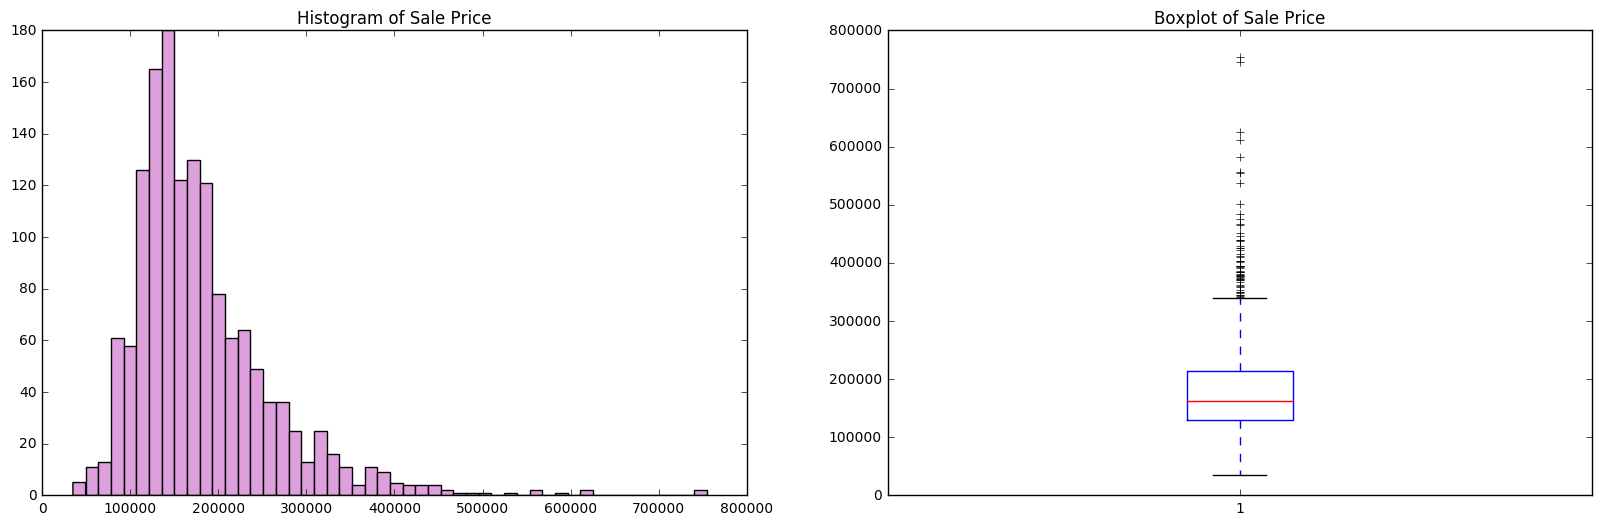

In [7]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.hist(df['SalePrice'],bins=50,color='plum')
ax2.boxplot(df['SalePrice'])
ax1.set_title("Histogram of Sale Price")
ax2.set_title("Boxplot of Sale Price")
plt.show()

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The `SalePrice` variable looks right skewed. This needs to be treated in data preprocessing to make it a more normal distribution.

## B. Numerical Features
We identify the numerical features contained in the datasets.

In [9]:
numeric=df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:37]
print "Number of numerical features:", numeric.shape[1]
numeric.describe()

Number of numerical features: 36


MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000          NaN    7553.500000     5.000000     5.000000   
50%      50.000000          NaN    9478.500000     6.000000     5.000000   
75%      70.000000          NaN   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000          NaN     0.000000     0.000000   
50%    1973.000000   1994.000000          NaN   383.500000     0.000000   
75%    2000.000000   2004.000000          NaN   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

          ...        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count     ...       1460.000000  1460.000000  1460.000000    1460.000000   
mean      ...        472.980137    94.244521    46.660274      21.954110   
std       ...        213.804841   125.338794    66.256028      61.119149   
min       ...          0.000000     0.000000     0.000000       0.000000   
25%       ...        334.500000     0.000000     0.000000       0.000000   
50%       ...        480.000000     0.000000    25.000000       0.000000   
75%       ...        576.000000   168.000000    68.000000       0.000000   
max       ...       1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      3.409589    15.060959     2.758904     43.489041     6.321918   
std      29.317331    55.757415    40.177307    496.123024     2.703626   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     5.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.000000   
max     508.000000   480.000000   738.000000  15500.000000    12.000000   

            YrSold  
count  1460.000000  
mean   2007.815753  
std       1.328095  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 36 columns]

### B.1 Check missing values among numerical predictors

In [10]:
# Training dataset
n_missing=[]
for col in numeric:
    n_missing.append(numeric[col].isnull().values.sum())
missing=pd.DataFrame({'Features': numeric.columns.values, 'Missing':n_missing})
print "Number of missing values among numerical predictors in the training data set:"
missing[missing['Missing']!=0]

Number of missing values among numerical predictors in the training data set:


Features  Missing
1   LotFrontage      259
7    MasVnrArea        8
24  GarageYrBlt       81

Among 36 numercal features in the training data set, there are 3 of them with missing values: "LotFrontage", "MasVnrArea" and "GarageYrBlt".

In [11]:
# Test dataset
numeric_test=df_test.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:37]
n_missing=[]
for col in numeric_test:
    n_missing.append(numeric_test[col].isnull().values.sum())
missing=pd.DataFrame({'Features': numeric_test.columns.values, 'Missing':n_missing})
print "Number of missing values among numerical predictors in the test data set:"
missing[missing['Missing']!=0]

Number of missing values among numerical predictors in the test data set:


Features  Missing
1    LotFrontage      227
7     MasVnrArea       15
8     BsmtFinSF1        1
9     BsmtFinSF2        1
10     BsmtUnfSF        1
11   TotalBsmtSF        1
16  BsmtFullBath        2
17  BsmtHalfBath        2
24   GarageYrBlt       78
25    GarageCars        1
26    GarageArea        1

Among 36 numercal features in the test data set, there are 11 of them with missing values. Many of these predictors with only one missing value come from the same observation.

### B.2 Feature Importance
In the following, we  fit simple linear models to each of the numeric feature on "Sale Price" to get a rough idea of which features can better interpret the variation in "Sale Price". We rank the features by R-squared value, and top 10 features are shown below:

In [12]:
y=df['SalePrice'].values
r_squared=[]
pvalues=[]
for i in range(36):
    model = OLS(y, numeric[[i]].values)
    results = model.fit()
    r_squared.append(results.rsquared)
    pvalues.append(results.pvalues)

In [13]:
t1=df[['SalePrice','LotFrontage']].dropna()
t2=df[['SalePrice','MasVnrArea']].dropna()
t3=df[['SalePrice','GarageYrBlt']].dropna()
model1 = OLS(t1['SalePrice'].values, t1['LotFrontage'].values)
results1 = model1.fit()
r_squared1=results1.rsquared
model2 = OLS(t2['SalePrice'].values, t2['MasVnrArea'].values)
results2 = model2.fit()
r_squared2=results2.rsquared
model3 = OLS(t3['SalePrice'].values, t3['GarageYrBlt'].values)
results3 = model3.fit()
r_squared3=results3.rsquared

In [14]:
xs=pd.DataFrame({'Features': numeric.columns.values, 'R-squared':r_squared})

In [15]:
xs.loc[xs['Features'] == "LotFrontage",'R-squared']=r_squared1
xs.loc[xs['Features'] == "MasVnrArea",'R-squared']=r_squared2
xs.loc[xs['Features'] == "GarageYrBlt",'R-squared']=r_squared3

In [16]:
xs.sort(['R-squared'],ascending=False)[:15]

C:\Users\zhengguo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Features  R-squared
3    OverallQual   0.927938
15     GrLivArea   0.918625
12      1stFlrSF   0.894413
25    GarageCars   0.890434
22  TotRmsAbvGrd   0.884291
11   TotalBsmtSF   0.884145
18      FullBath   0.880884
26    GarageArea   0.879122
24   GarageYrBlt   0.850709
5      YearBuilt   0.844158
6   YearRemodAdd   0.842245
35        YrSold   0.838436
1    LotFrontage   0.821349
20  BedroomAbvGr   0.808598
4    OverallCond   0.795390

From the exploratory analysis and our common sense/interests, we think following numeric features may be more significantly related to "Sale Price" among others: **OverallQual, GrLivArea, 1stFlrSF, GarageCars, TotRmsAbvGrd, TotalBsmtSF, FullBath, GargeArea, YearBuilt, YearRemodAdd, YrSold**.

We'll further explore the distribution and relationships of these features.
#### `GriLivArea`

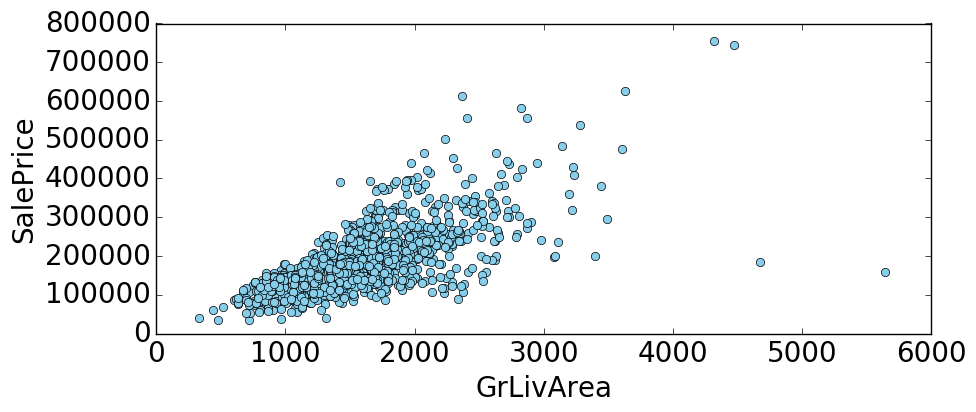

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(numeric['GrLivArea'].values,y,'o',color='skyblue')
ax.set_xlabel('GrLivArea', size='20')
ax.set_ylabel('SalePrice', size='20')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.show()

It looks like there are a few outliers with extremely large above ground living area. We shall remove them from our consideration in data pre-processing. 
#### `OverallQual`, `FullBath`, `1stFlrSf`, `TotRmAbvGrd`, `TotalBsmtSF`, `GarageCars`

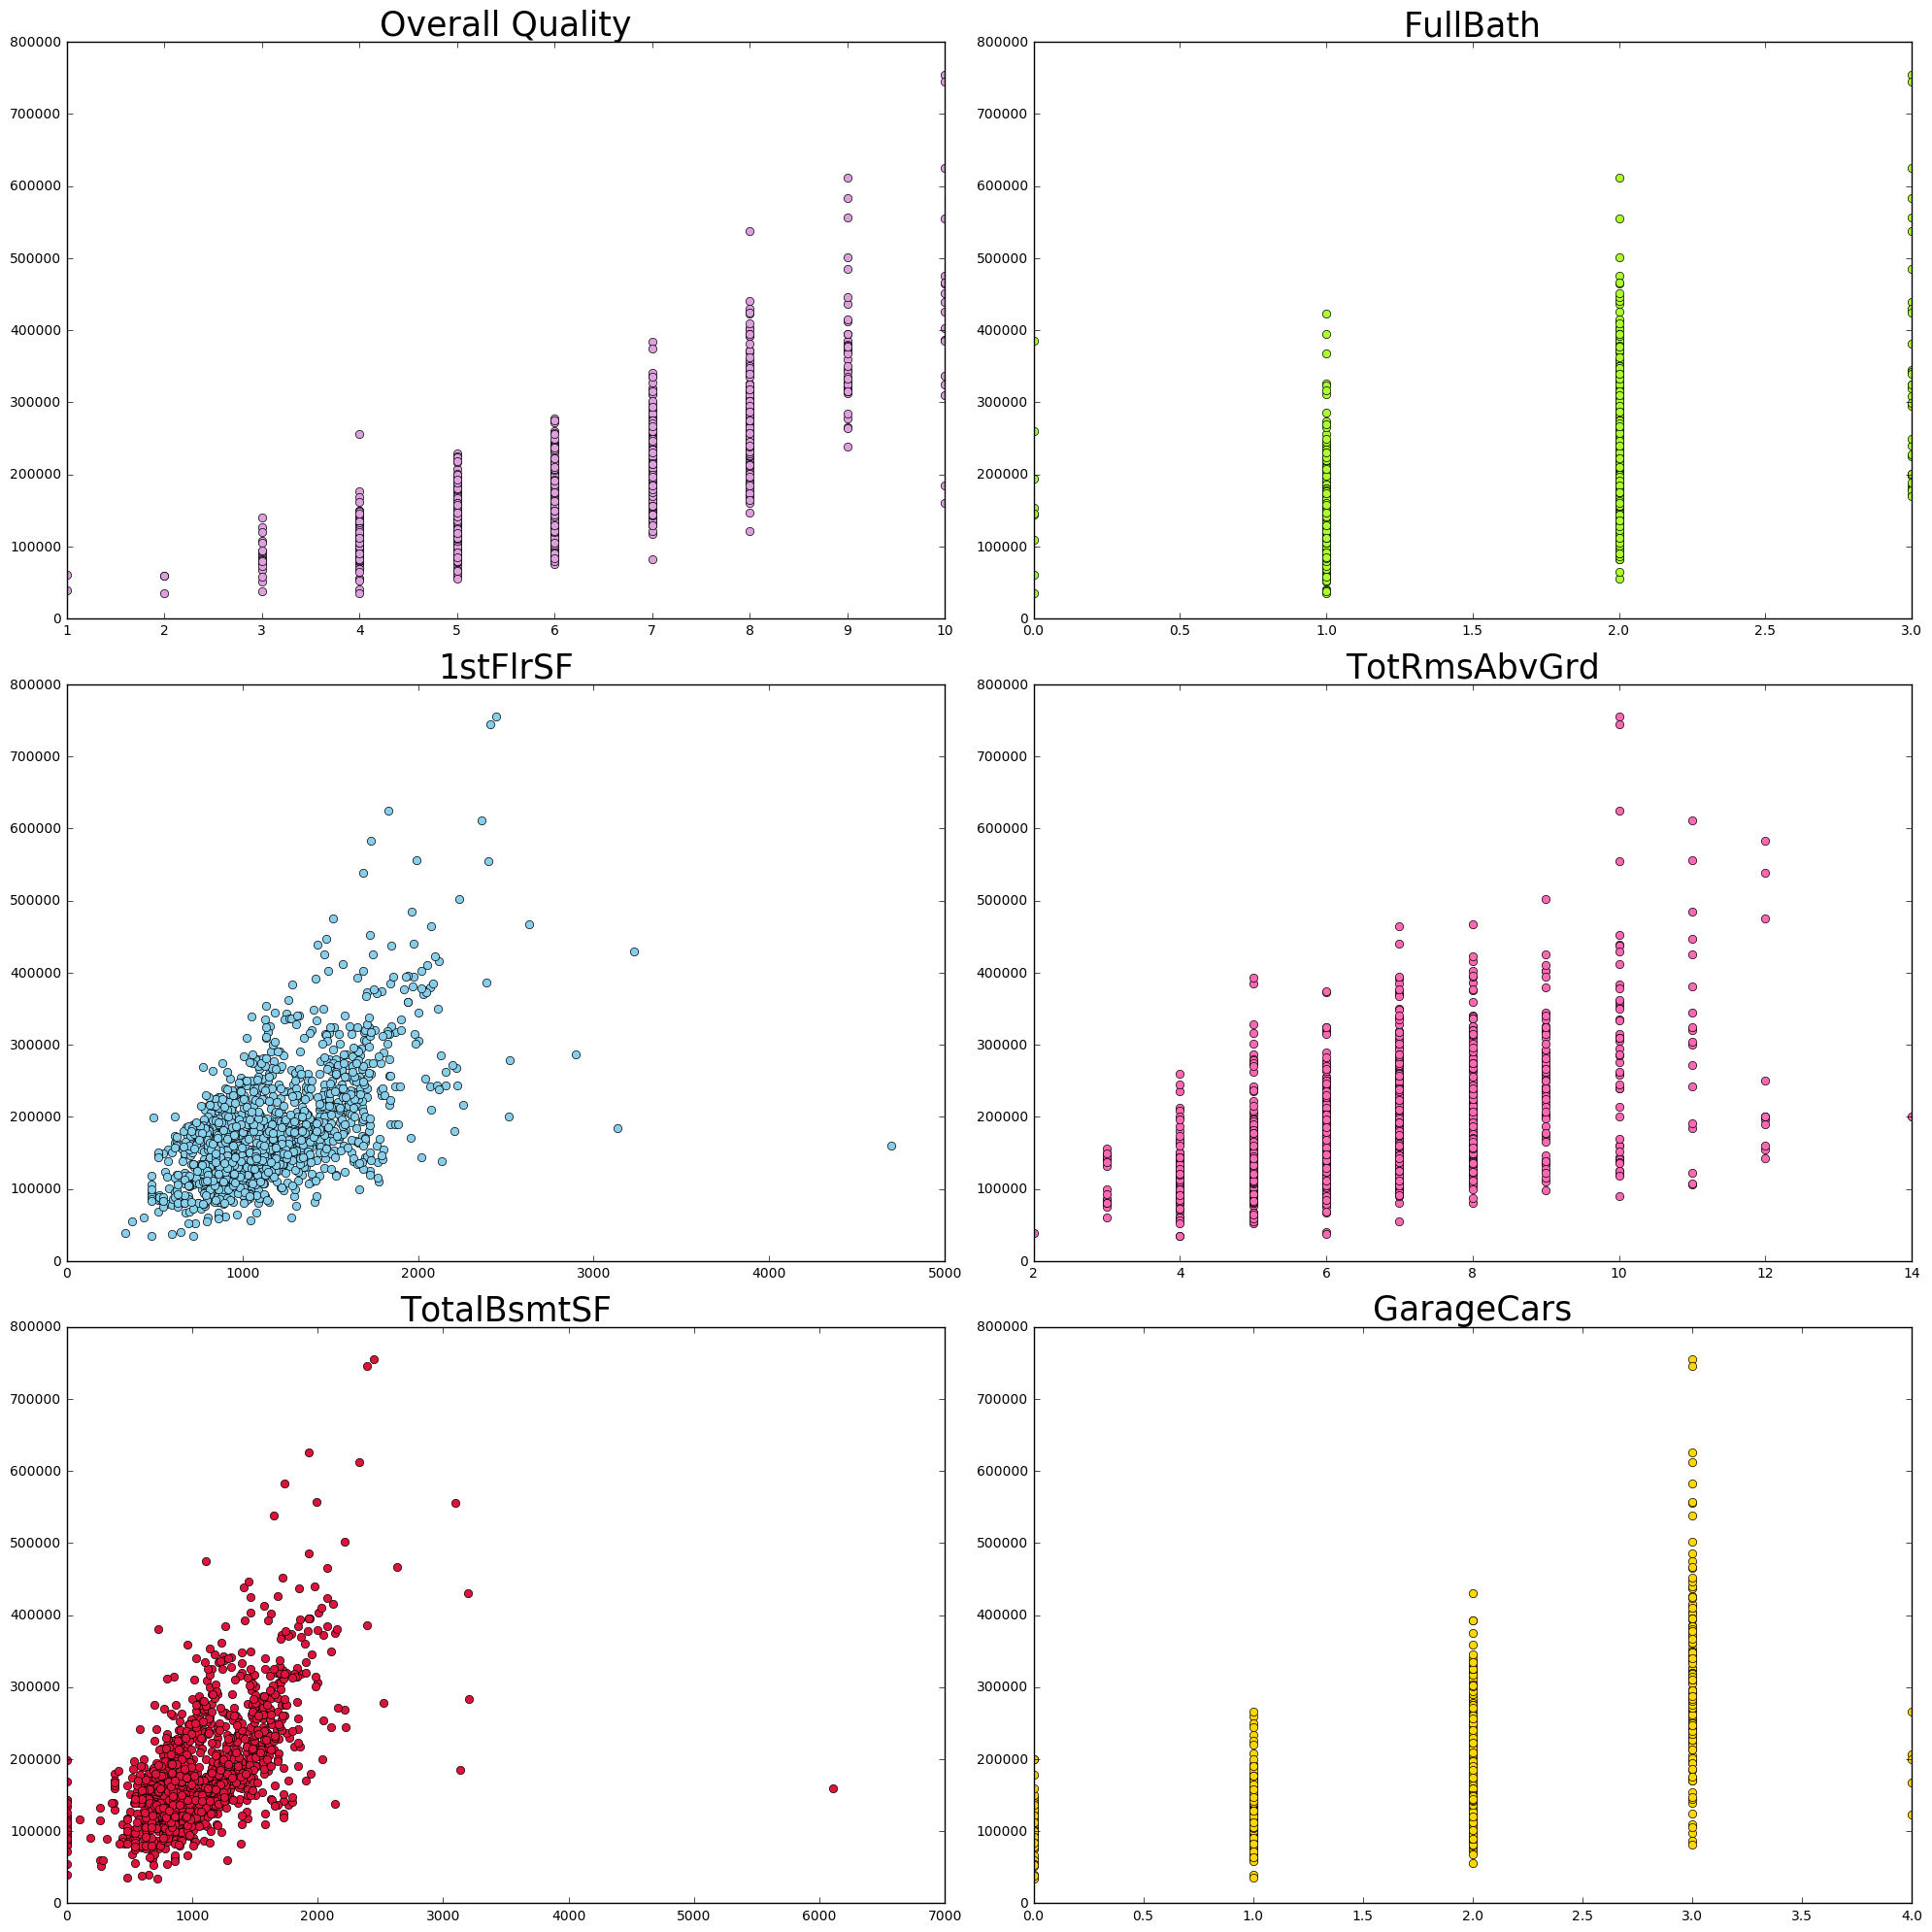

In [18]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 20))
ax1.set_title('Overall Quality',fontsize=25)
ax1=ax1.plot(numeric['OverallQual'].values,y,'o',color='plum')
ax2.set_title('FullBath',fontsize=25)
ax2=ax2.plot(numeric['FullBath'].values,y,'o',color='greenyellow')
ax3.set_title('1stFlrSF',fontsize=25)
ax3=ax3.plot(numeric['1stFlrSF'].values,y,'o',color='skyblue')
ax4.set_title('TotRmsAbvGrd',fontsize=25)
ax4=ax4.plot(numeric['TotRmsAbvGrd'].values,y,'o',color='hotpink')
ax5.set_title('TotalBsmtSF',fontsize=25)
ax5=ax5.plot(numeric['TotalBsmtSF'].values,y,'o',color='crimson')
ax6.set_title('GarageCars',fontsize=25)
ax6=ax6.plot(numeric['GarageCars'].values,y,'o',color='gold')
plt.tight_layout()
plt.show()

As shown in the plots, **OverallQual, GrLivArea, 1stFlrSF, GarageCars, TotRmsAbvGrd, TotalBsmtSF, and GargeArea** all increase as sale price of the property increases. They are all positively related to sale price, and the relationships are roughly linear.
We also notice that some of these predictors have discrete values and others are continuous. We proceed to differentiate between the two manually. 

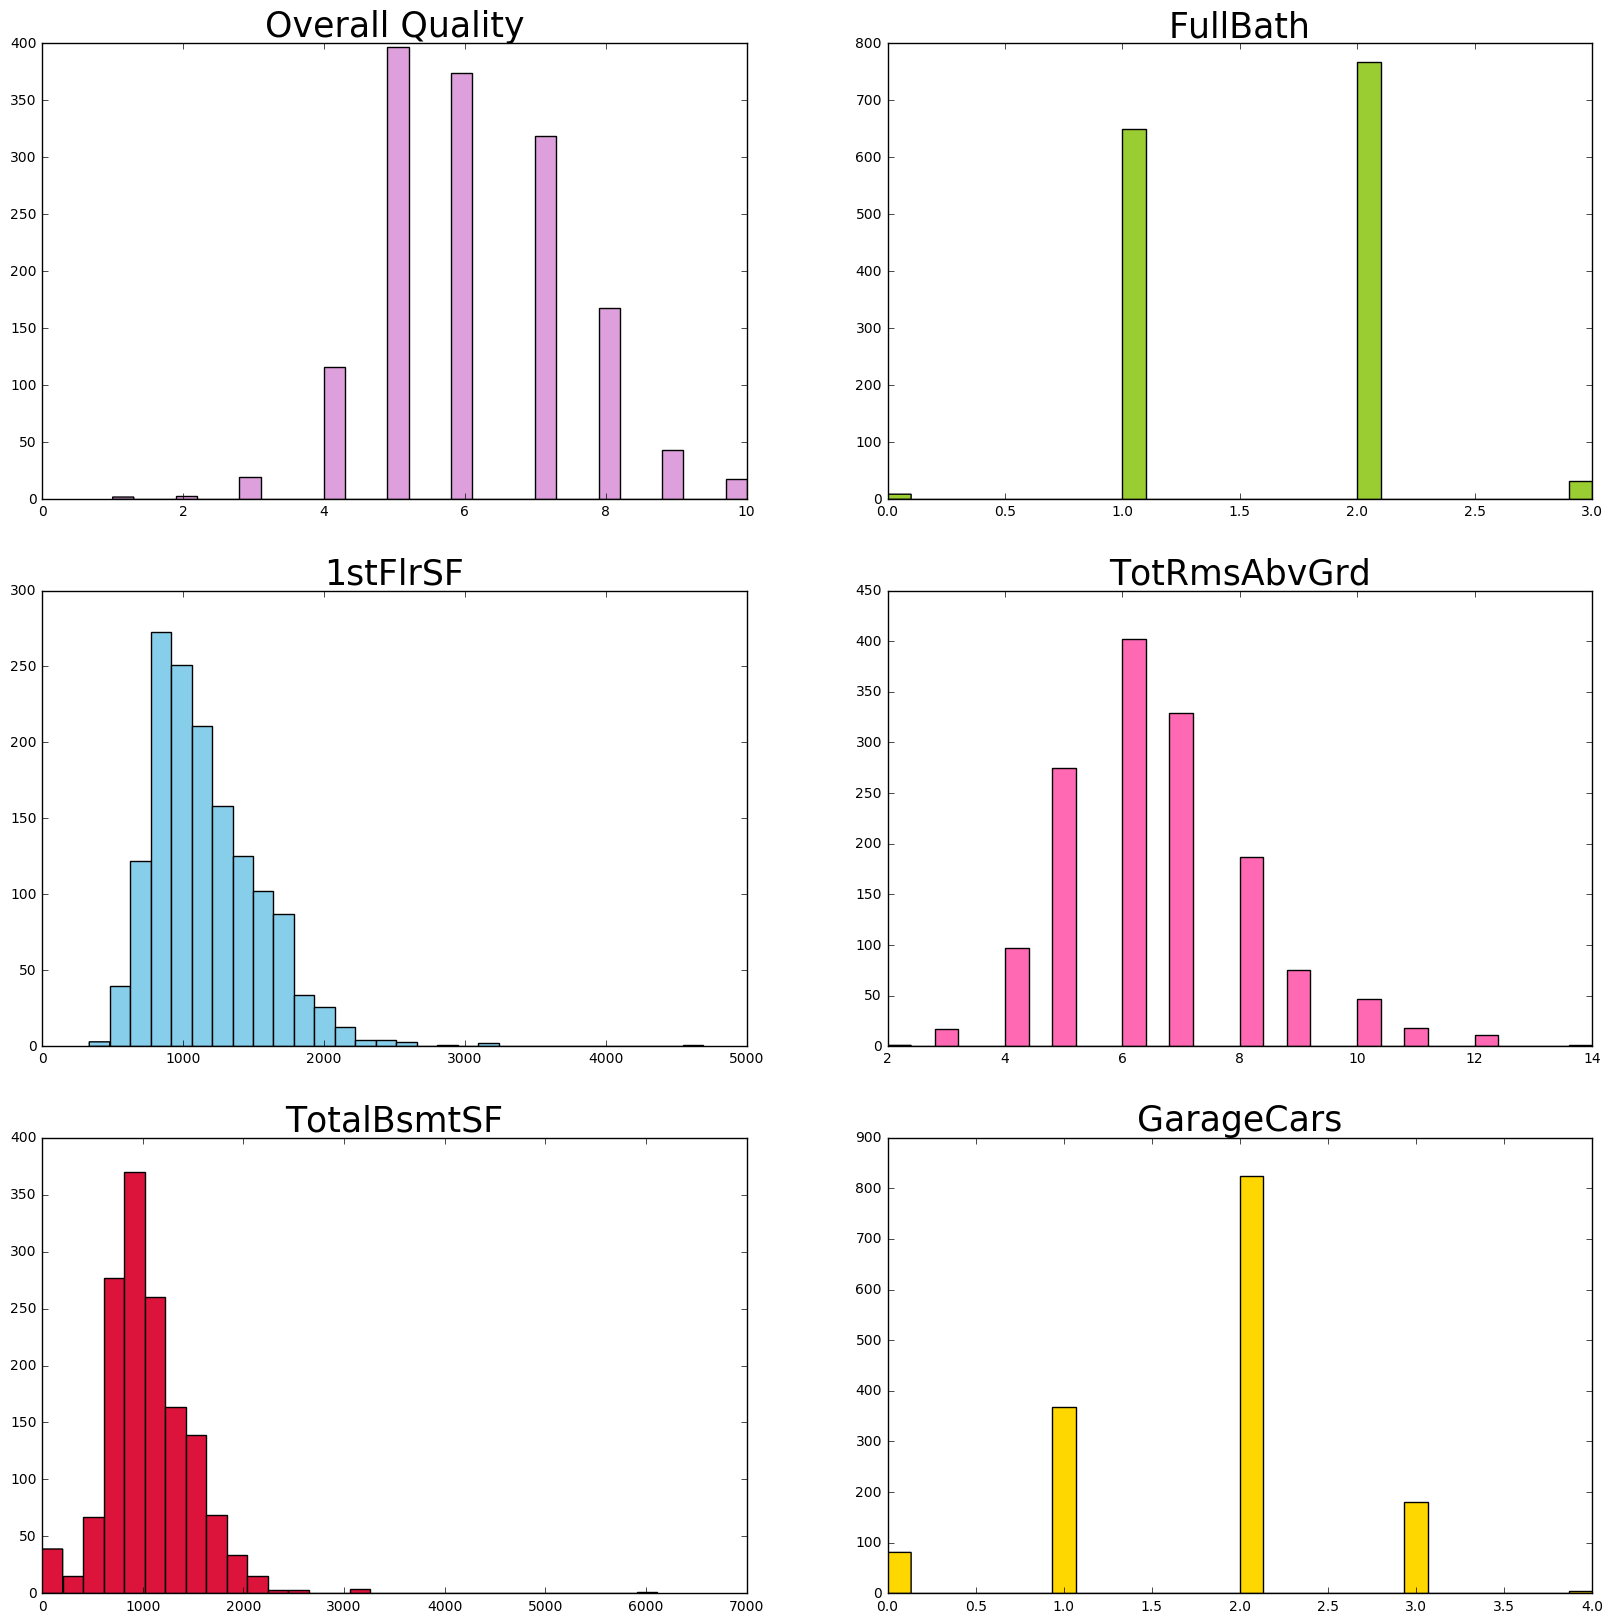

In [19]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 20))
ax1.set_title('Overall Quality',fontsize=25)
ax1=ax1.hist(numeric['OverallQual'].values,color='plum',bins=30)
ax2.set_title('FullBath',fontsize=25)
ax2=ax2.hist(numeric['FullBath'].values,color='yellowgreen',bins=30)
ax3.set_title('1stFlrSF',fontsize=25)
ax3=ax3.hist(numeric['1stFlrSF'].values,color='skyblue', bins=30)
ax4.set_title('TotRmsAbvGrd',fontsize=25)
ax4=ax4.hist(numeric['TotRmsAbvGrd'].values,color='hotpink', bins=30)
ax5.set_title('TotalBsmtSF',fontsize=25)
ax5=ax5.hist(numeric['TotalBsmtSF'].values,color='crimson', bins=30)
ax6.set_title('GarageCars',fontsize=25)
ax6=ax6.hist(numeric['GarageCars'].values, color='gold',bins=30)


plt.show()

As shown above, there's no extreme deviation of normal distribution for the distribution of **OverallQual, GrLivArea, 1stFlrSF, GarageCars, TotRmsAbvGrd, TotalBsmtSF, and GargeArea**. The distribution of GrLivArea and 1stFlrSF are slightly right-skewed.

### B.3 Feature Correlation
We check for any possible correlations between numerical features.

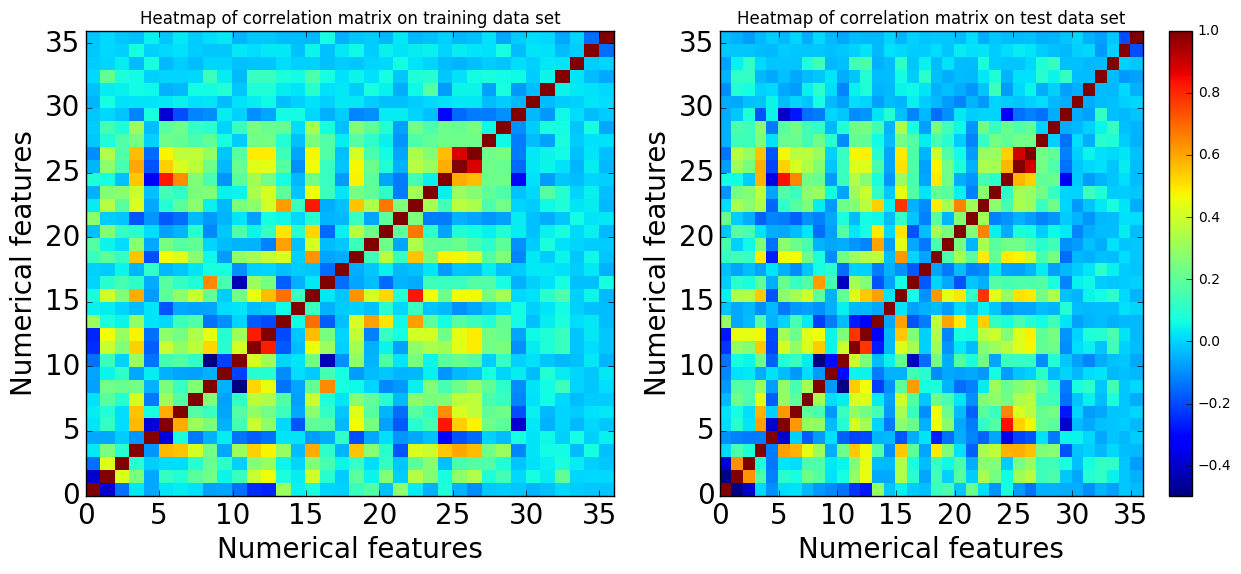

In [20]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,6))

corr_train = numeric.corr()
ax1.pcolor(corr_train)
ax1.set_xlim([0,36])
ax1.set_ylim([0,36])
ax1.set_xlabel('Numerical features', size='20')
ax1.set_ylabel('Numerical features', size='20')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_title('Heatmap of correlation matrix on training data set')

corr_test = numeric_test.corr()
ax2.pcolor(corr_test)
ax2.set_xlim([0,36])
ax2.set_ylim([0,36])
ax2.set_xlabel('Numerical features', size='20')
ax2.set_ylabel('Numerical features', size='20')
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_title('Heatmap of correlation matrix on test data set')

plt.colorbar(ax.pcolor(corr_train))
plt.show()

From the correlation heat maps, there are few if any features that are highly correlated. This means we are able to perform multilinear regression on the numerical features to fill in the missing values without additional treatment. 

For the list of more important numerical features above, we check their correlation in following using the training data set:

In [21]:
sig=numeric[['OverallQual', 'GrLivArea', '1stFlrSF', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 'FullBath', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'YrSold']]

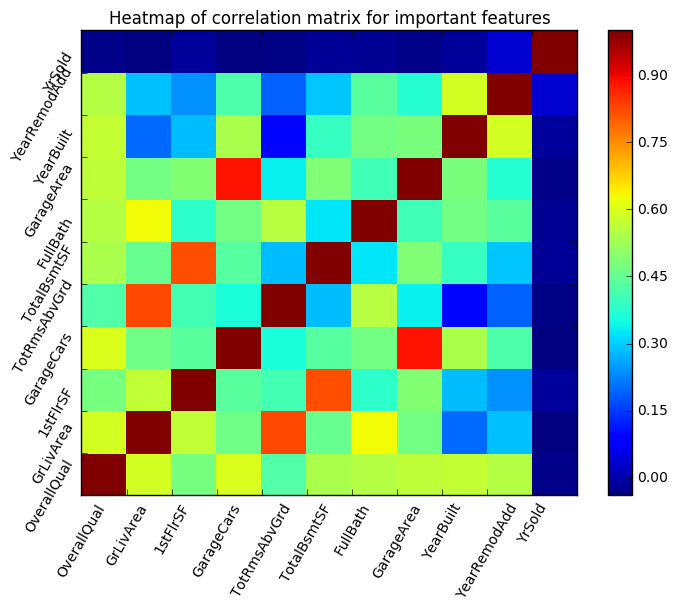

In [22]:
corr = sig.corr()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.pcolor(corr)
ax.set_xlim([0,11])
ax.set_ylim([0,11])
ax.set_title('Heatmap of correlation matrix for important features')
ax.set_xticks(range(0,11))
ax.set_yticks(range(0,11))
ax.set_xticklabels(('OverallQual', 'GrLivArea', '1stFlrSF', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 'FullBath', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'YrSold'),rotation=60)
ax.set_yticklabels(('OverallQual', 'GrLivArea', '1stFlrSF', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 'FullBath', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'YrSold'),rotation=60)
plt.colorbar(ax.pcolor(corr))
plt.show()

`GarageArea` and `GarageCars` are highly correlated - since a larger garage area is able to house a greater number of cars. `TotRmsAbvGrd` (total number of rooms above ground) and `GrLivArea` (above ground living area) are also somewhat correlated since a larger living area usually mean a greater number of rooms. However, we did not remove either feature from our model since the correlation is not extremely high, and we do not want to eliminate any possible effects of either. 

## C. Categorical Features
We proceed to examine the categorical features in the dataset. 

In [23]:
categorical = df.select_dtypes(include = ['object'])
print "Number of categorical features identified:", categorical.shape[1]
print "They are: ", categorical.columns.values
categorical.describe()

Number of categorical features identified: 43
They are:  ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1460         1460       1460      ...            1379   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1382          225       1260      ...             870   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1379       1379       1379       1460      7    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq            605       1311       1326       1340      3    157   

       MiscFeature SaleType SaleCondition  
count           54     1460          1460  
unique           4        9             6  
top           Shed       WD        Normal  
freq            49     1267          1198  

[4 rows x 43 columns]

In [24]:
categorical_full = pd.concat([categorical, df[['MSSubClass', 'OverallQual', 'OverallCond']]])
print 'Number of categorical features:', categorical_full.shape[1]

Number of categorical features: 46


There are therefore a total of 46 categorical variables. 

### C.1 Missing Values

In [25]:
# check missing value
n_missing_categorical = []
for col in categorical_full:
    n_missing_categorical.append(categorical_full[col].isnull().values.sum())
missing_categorical=pd.DataFrame({'Features': categorical_full.columns.values, 'Missing':n_missing_categorical})
print "Number of missing values in both train and test data set"
missing_categorical[missing_categorical['Missing']!=0]

Number of missing values in both train and test data set


Features  Missing
0           Alley     2829
1        BldgType     1460
2        BsmtCond     1497
3    BsmtExposure     1498
4    BsmtFinType1     1497
5    BsmtFinType2     1498
6        BsmtQual     1497
7      CentralAir     1460
8      Condition1     1460
9      Condition2     1460
10     Electrical     1461
11      ExterCond     1460
12      ExterQual     1460
13    Exterior1st     1460
14    Exterior2nd     1460
15          Fence     2639
16    FireplaceQu     2150
17     Foundation     1460
18     Functional     1460
19     GarageCond     1541
20   GarageFinish     1541
21     GarageQual     1541
22     GarageType     1541
23        Heating     1460
24      HeatingQC     1460
25     HouseStyle     1460
26    KitchenQual     1460
27    LandContour     1460
28      LandSlope     1460
29      LotConfig     1460
30       LotShape     1460
31     MSSubClass     1460
32       MSZoning     1460
33     MasVnrType     1468
34    MiscFeature     2866
35   Neighborhood     1460
36    OverallCond     1460
37    OverallQual     1460
38     PavedDrive     1460
39         PoolQC     2913
40       RoofMatl     1460
41      RoofStyle     1460
42  SaleCondition     1460
43       SaleType     1460
44         Street     1460
45      Utilities     1460

However, we notice that for some of these categorical features, 'NA' as in not applicable is a valid response. We identify these and furthur treat them in the next section of data processing. 

### C.2 Summary of features

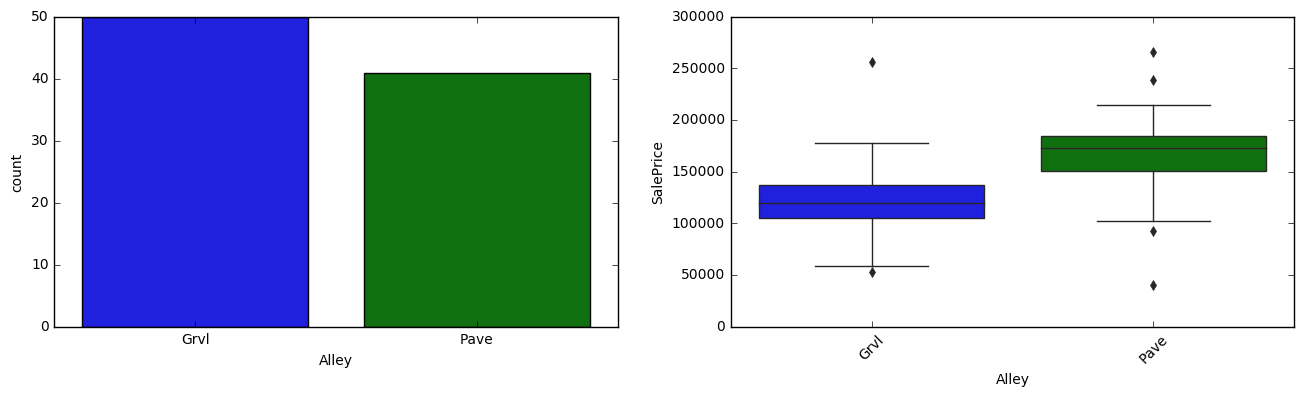

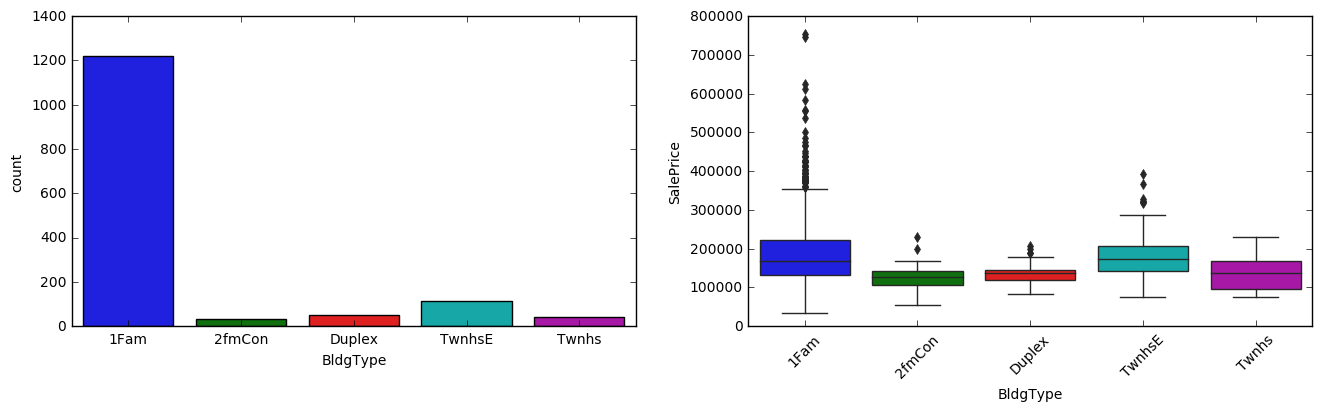

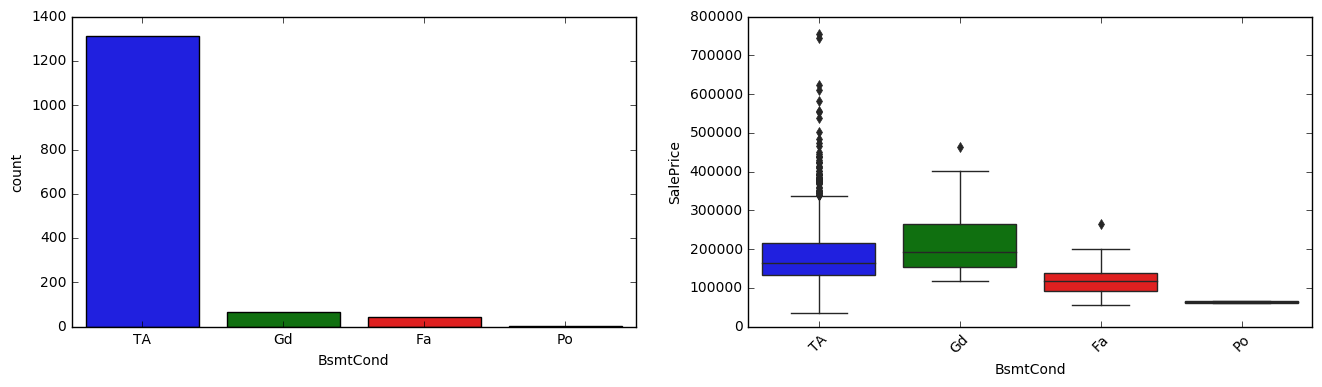

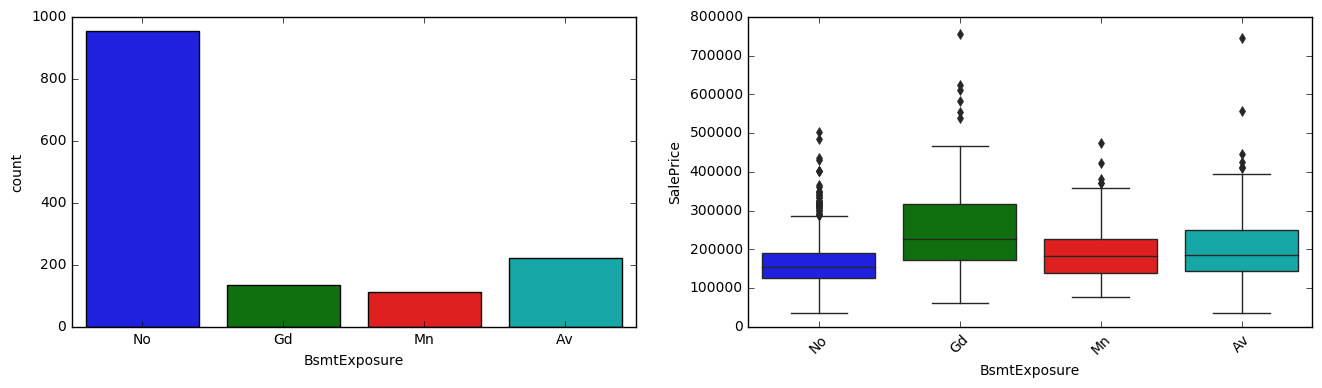

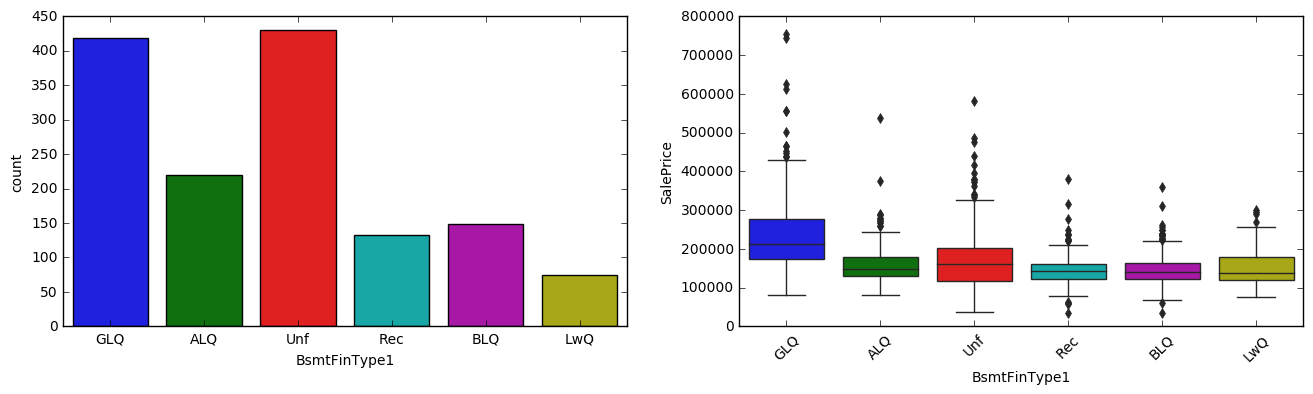

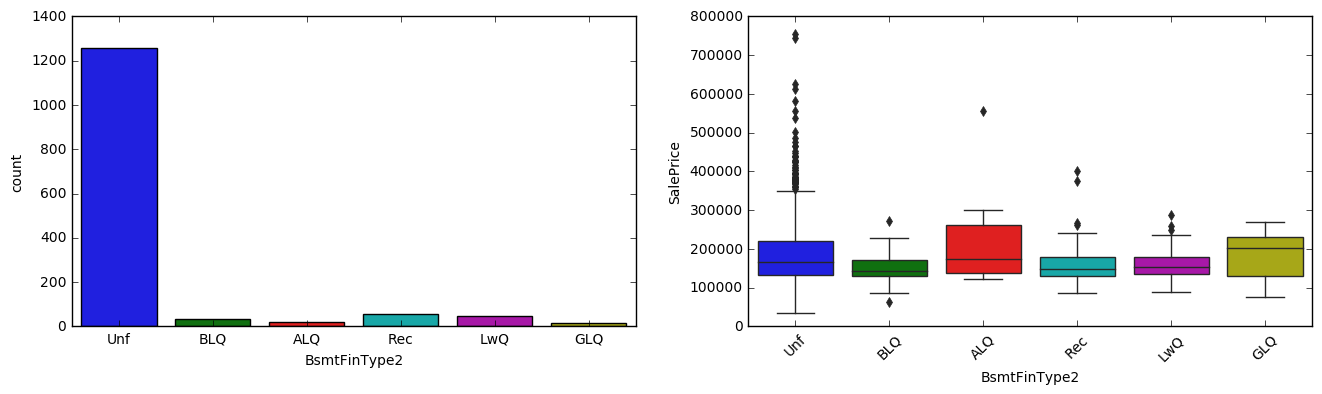

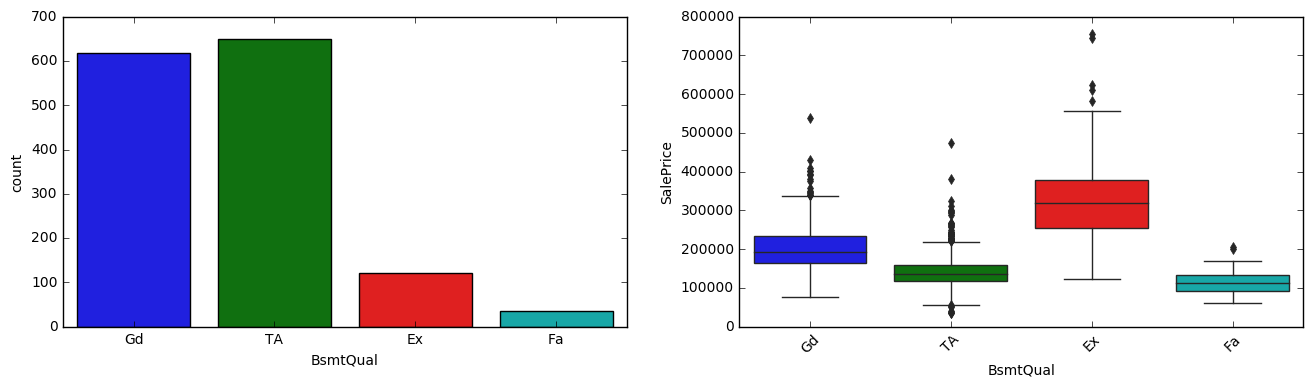

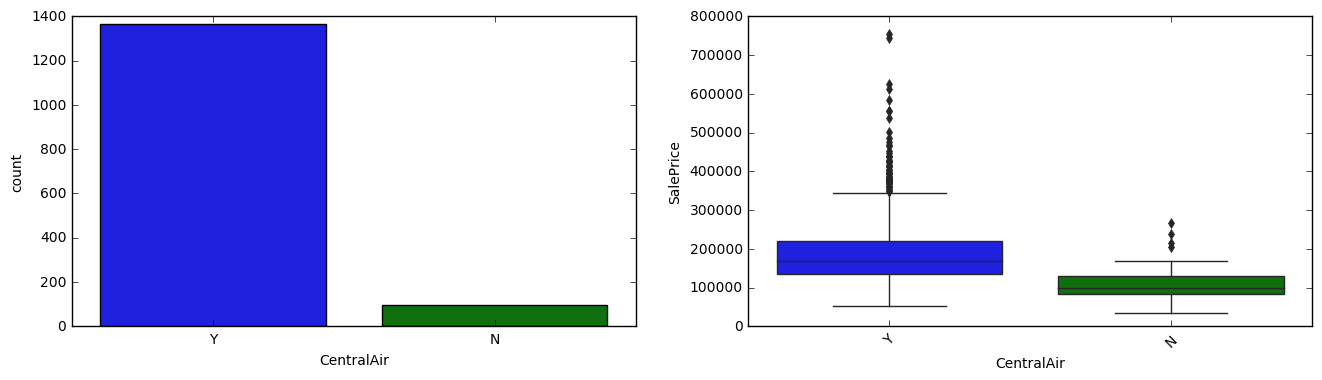

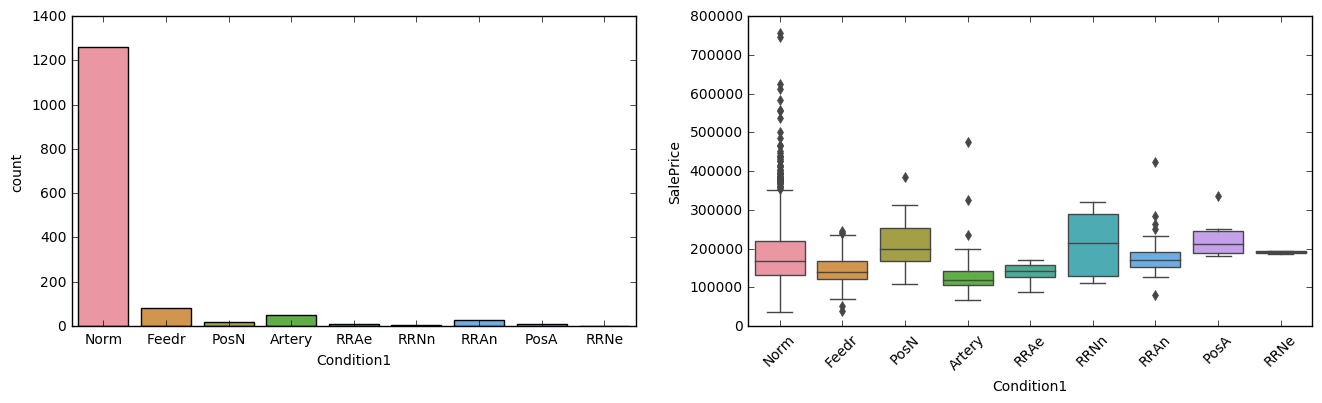

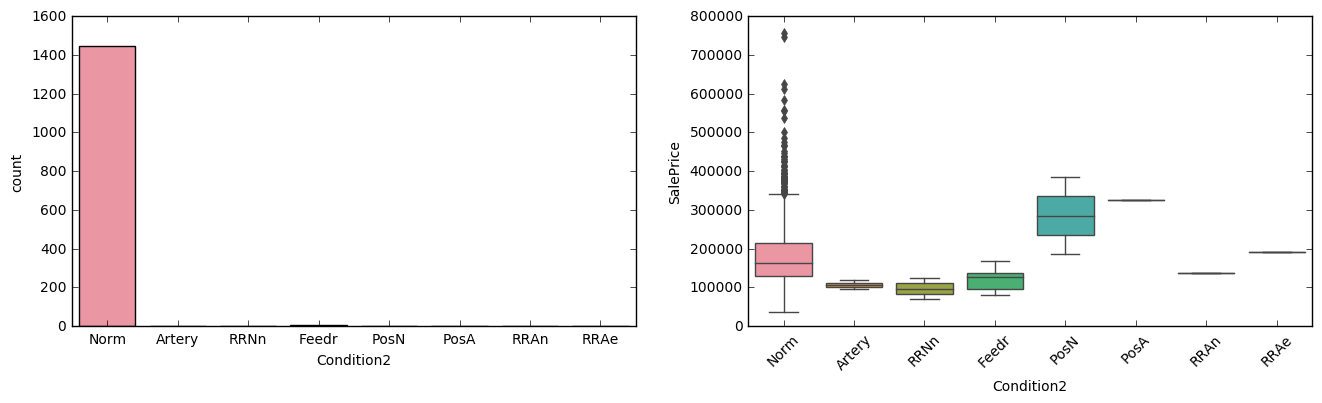

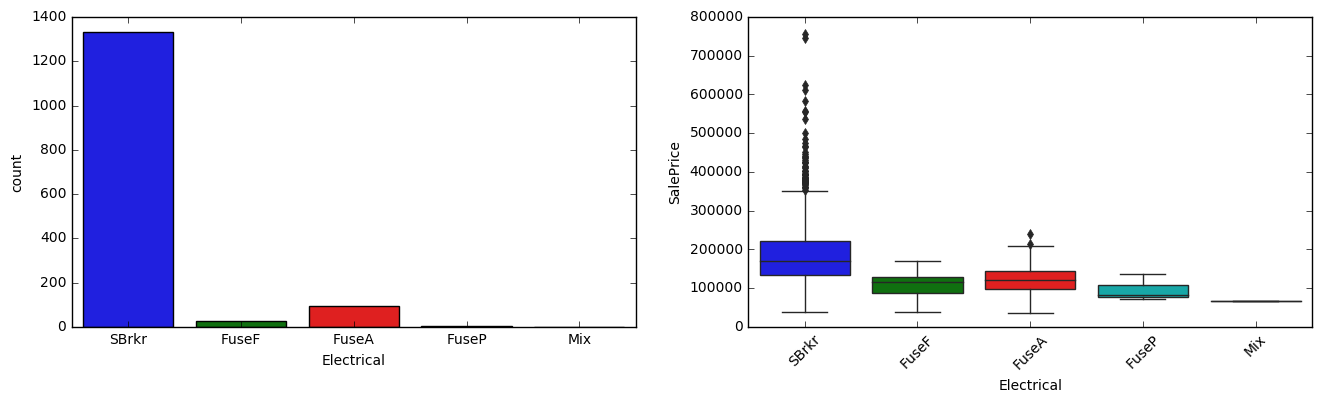

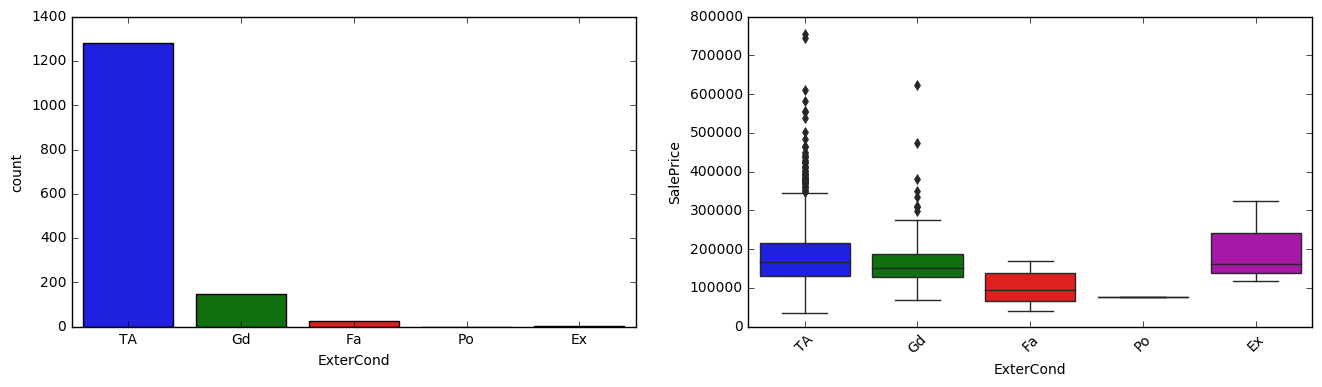

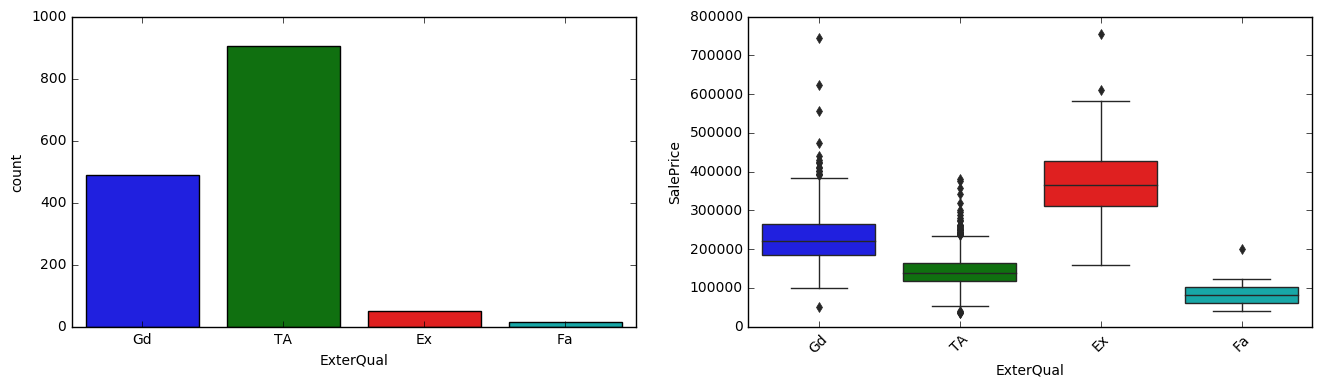

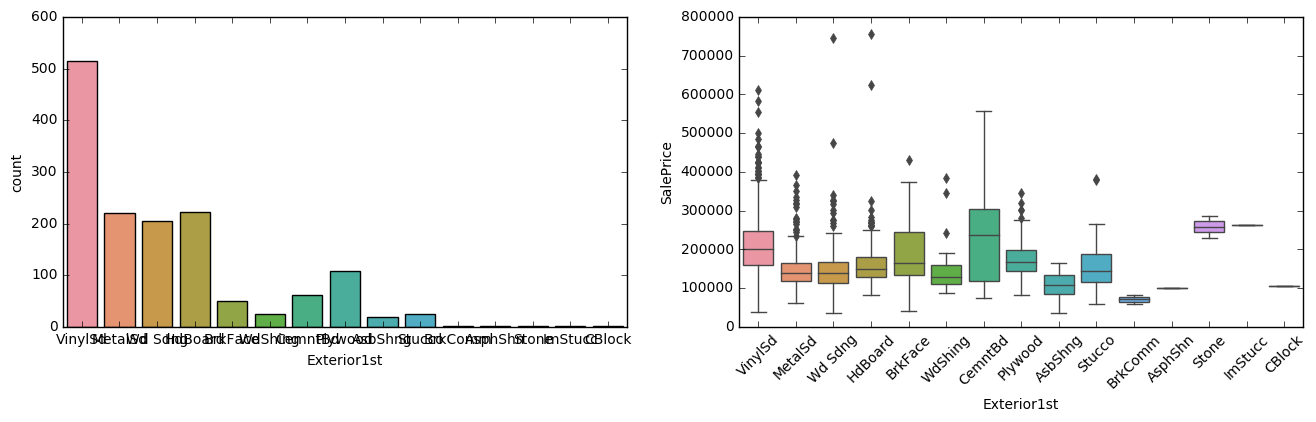

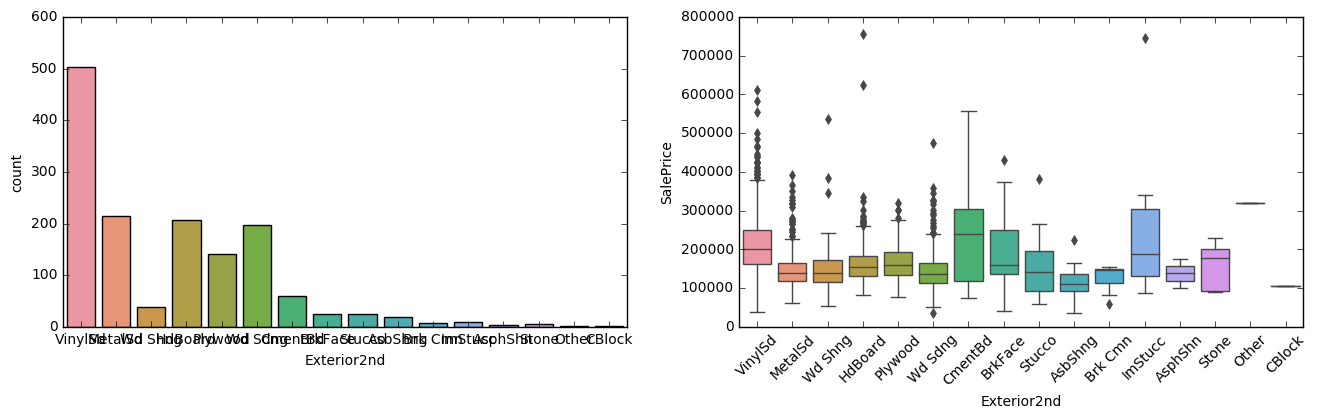

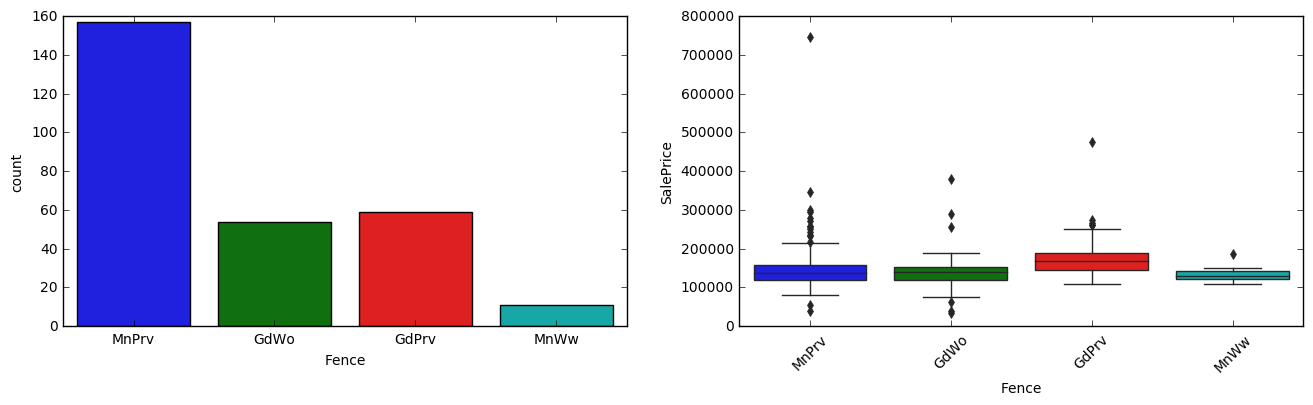

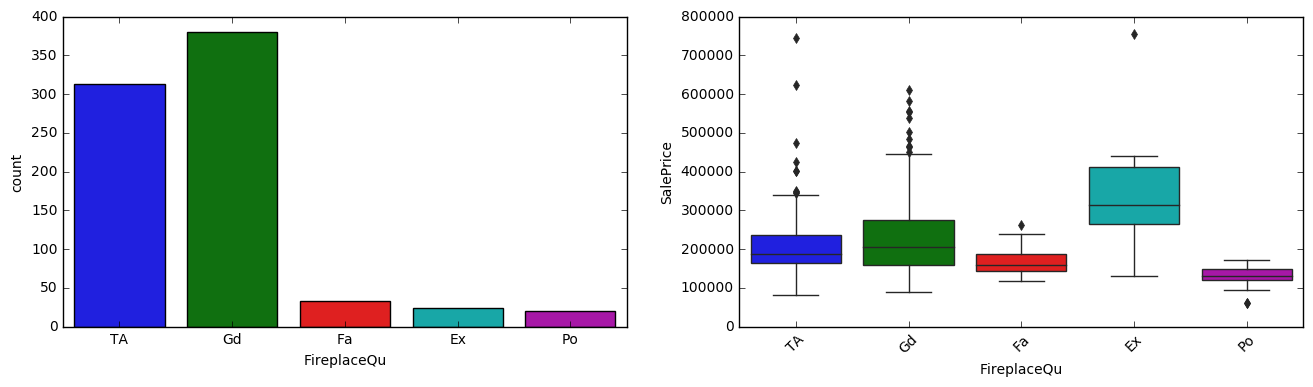

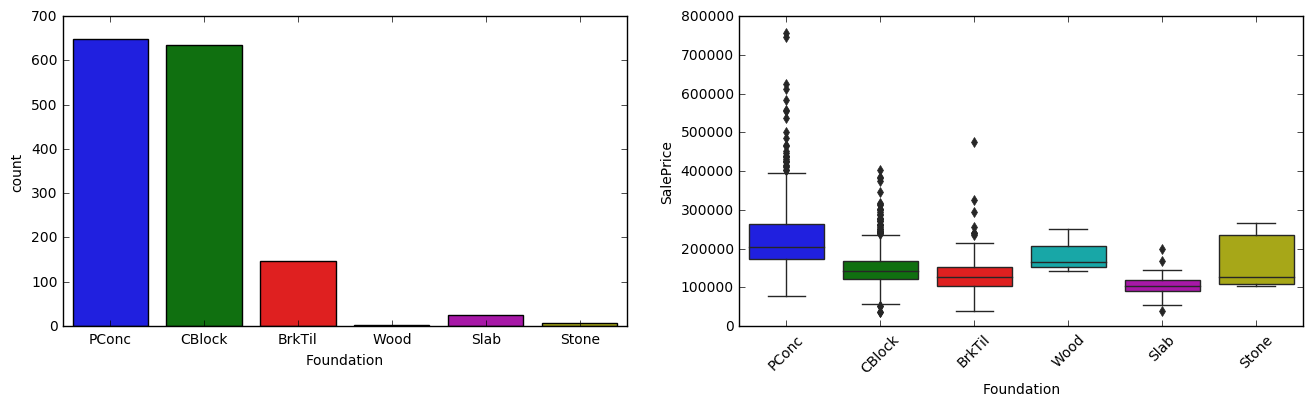

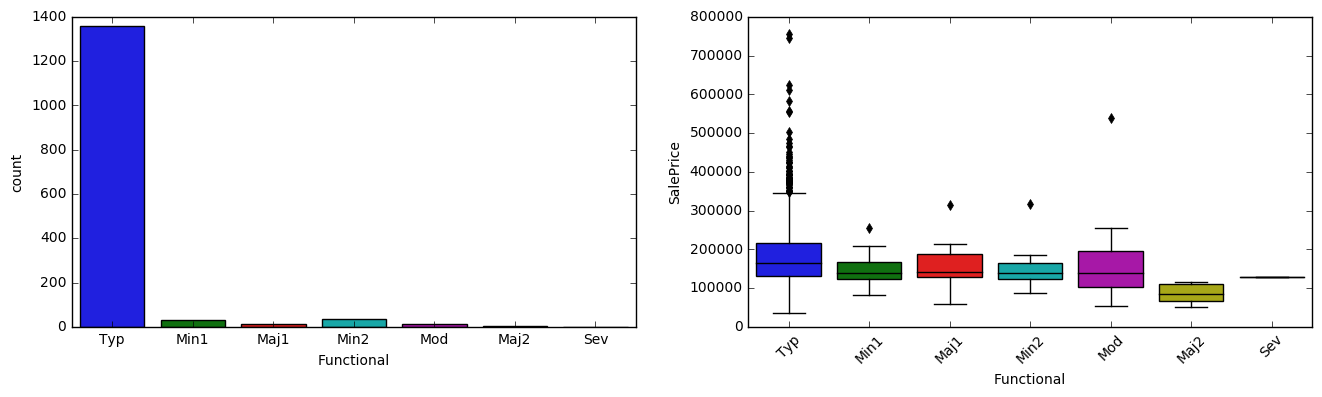

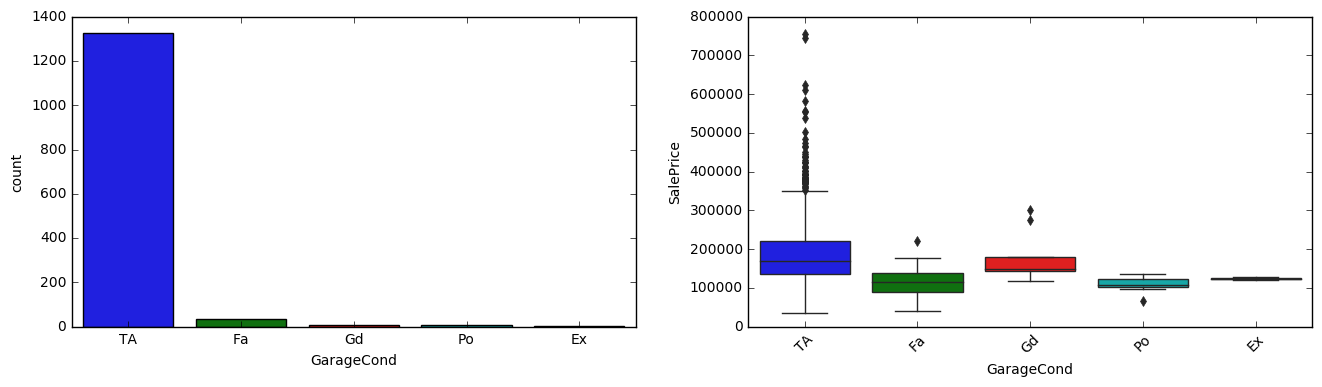

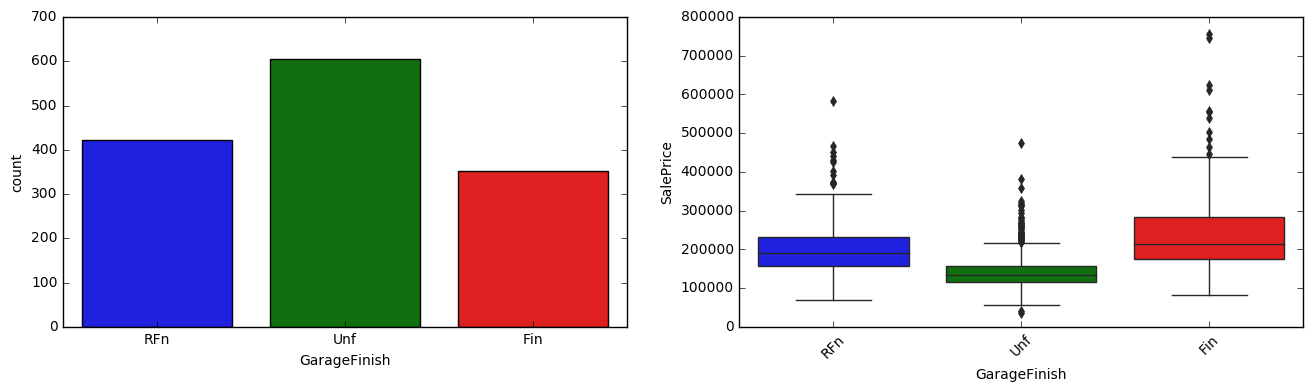

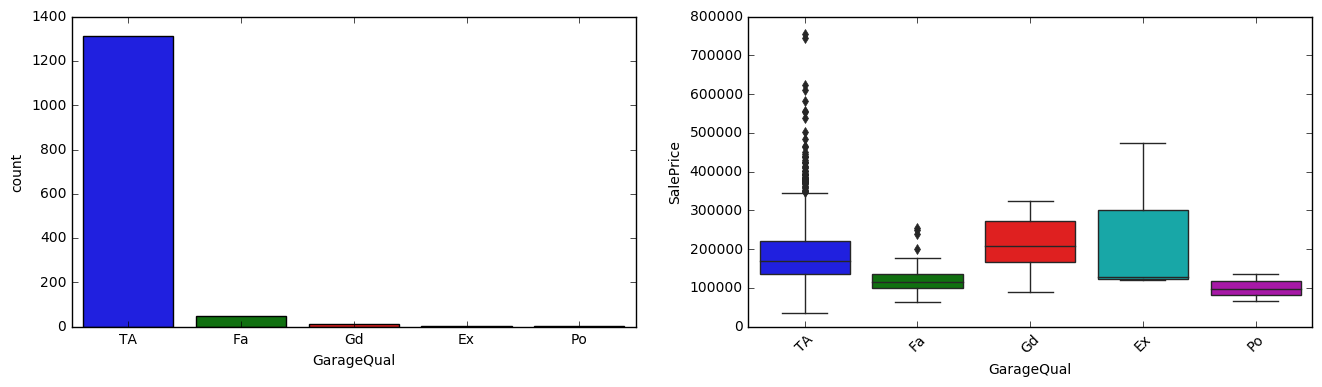

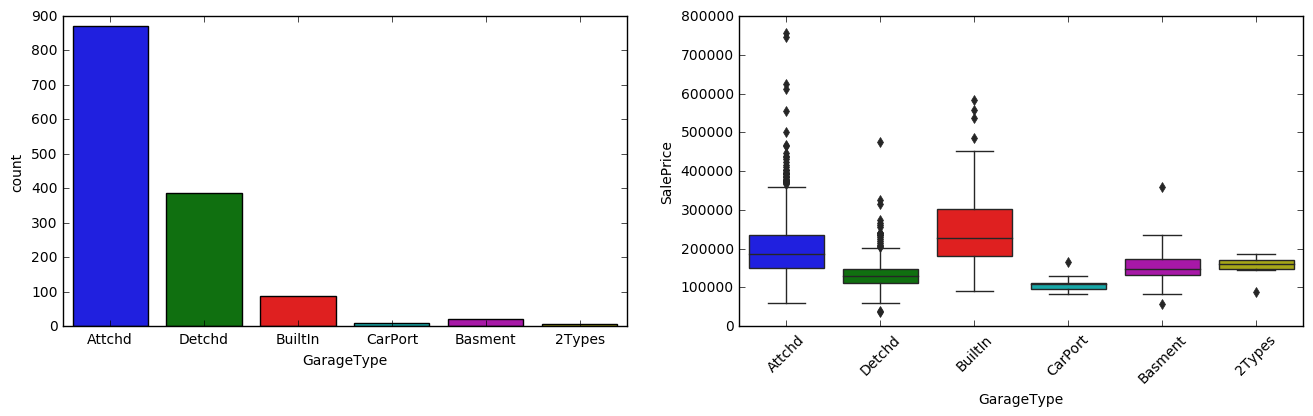

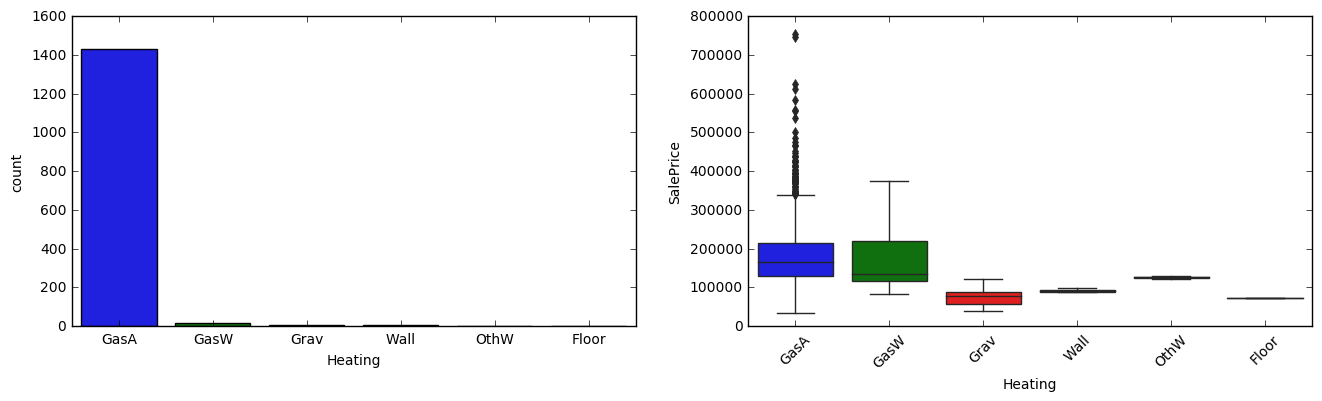

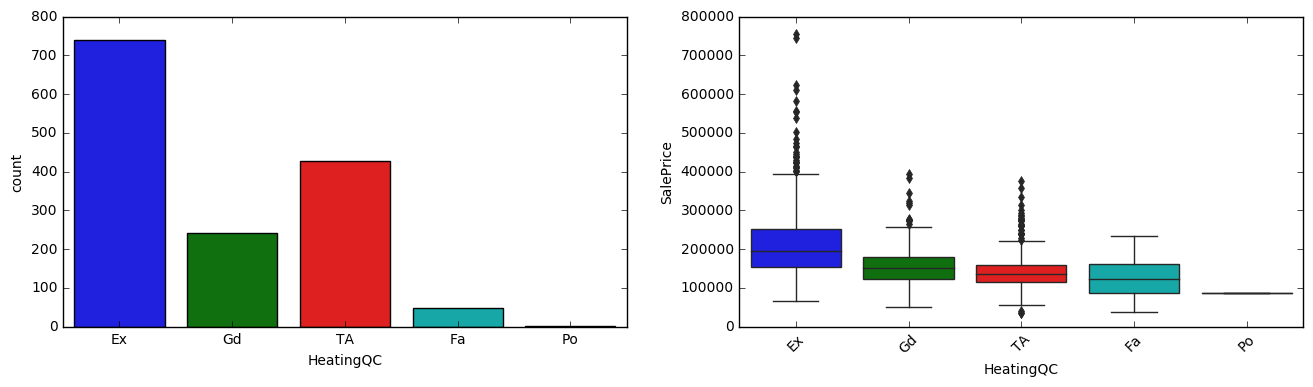

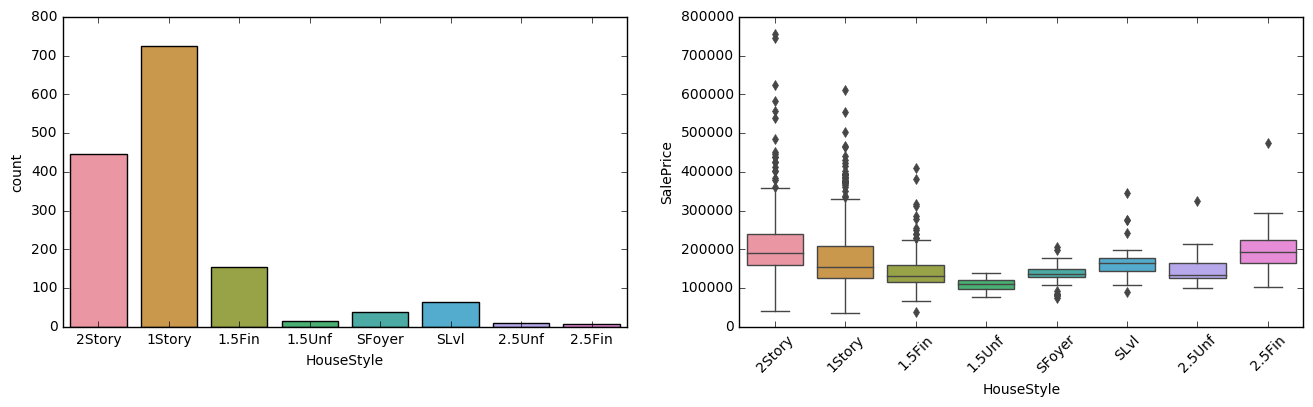

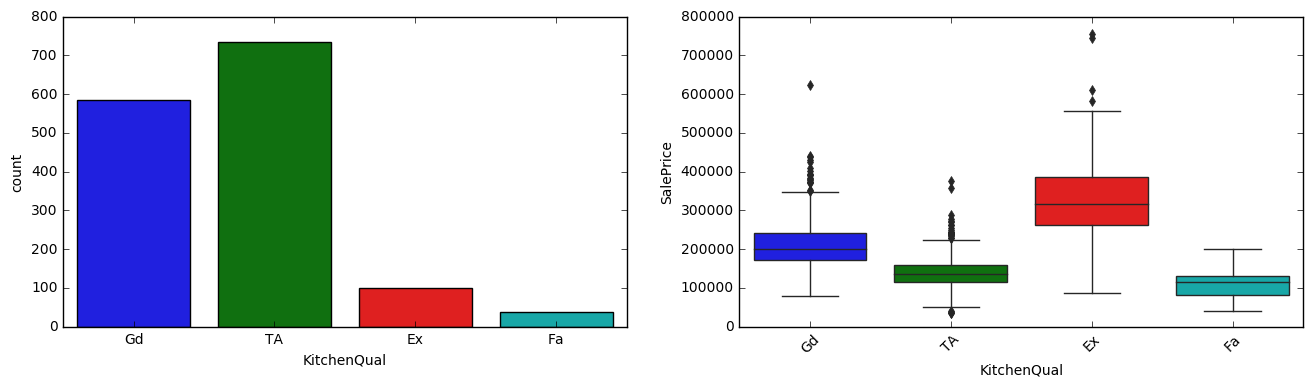

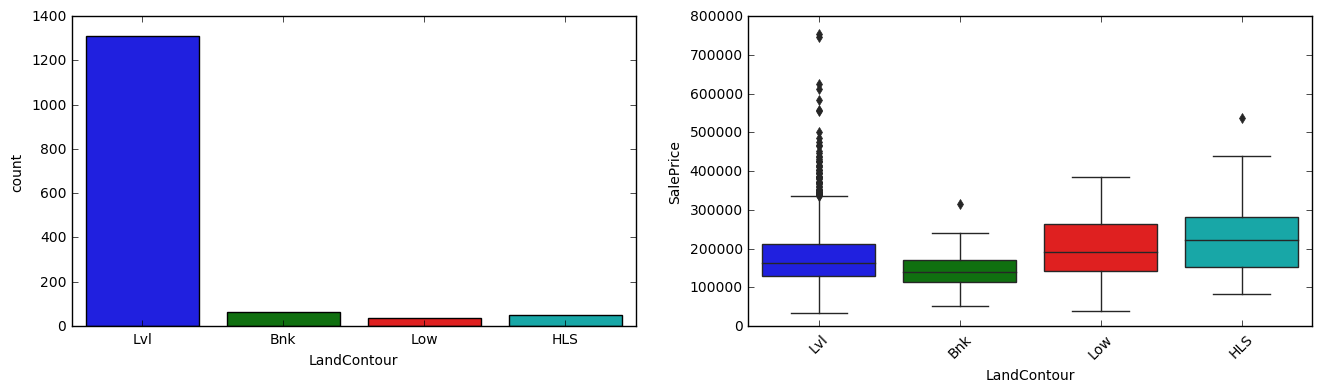

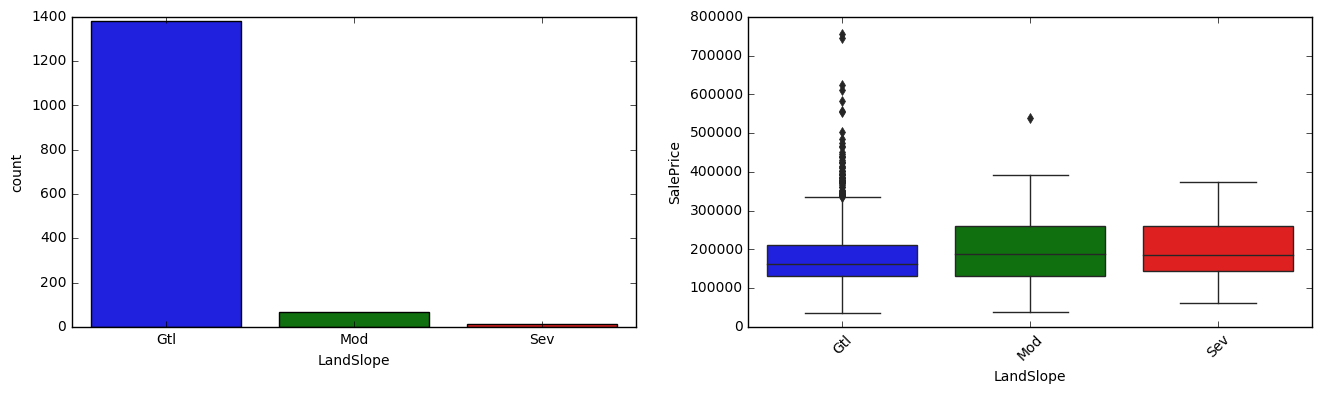

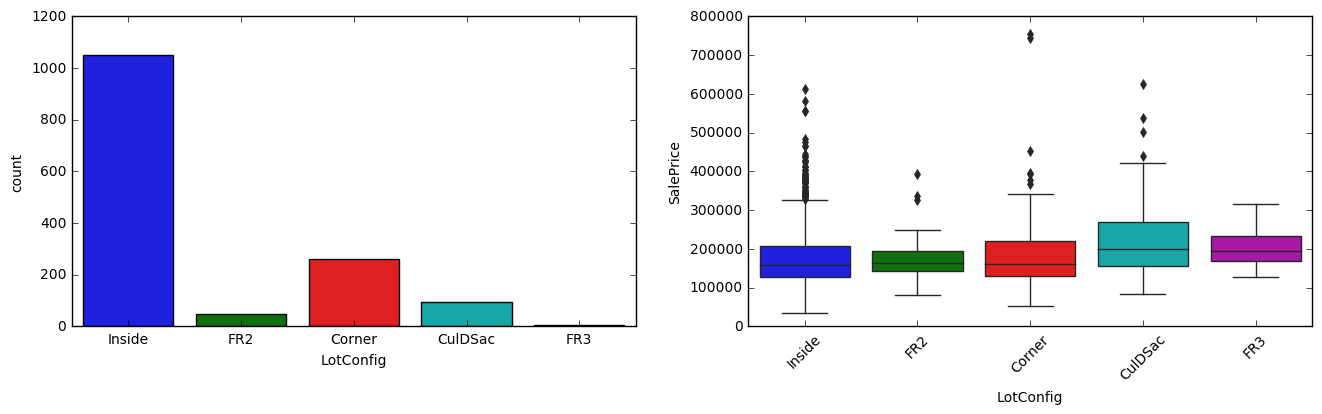

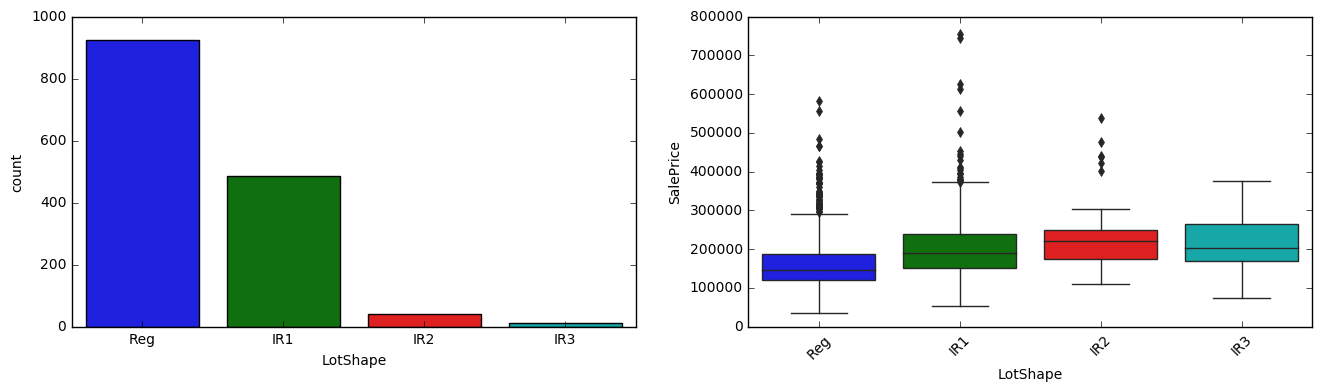

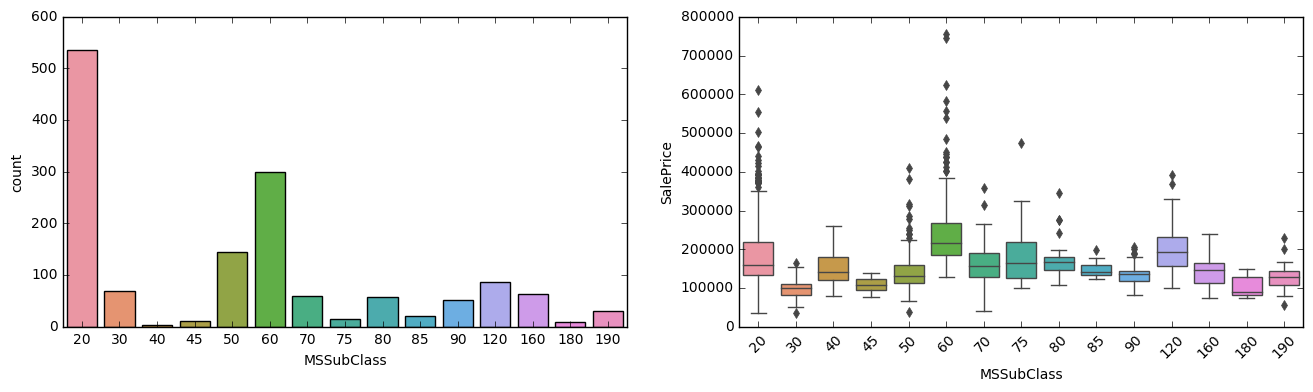

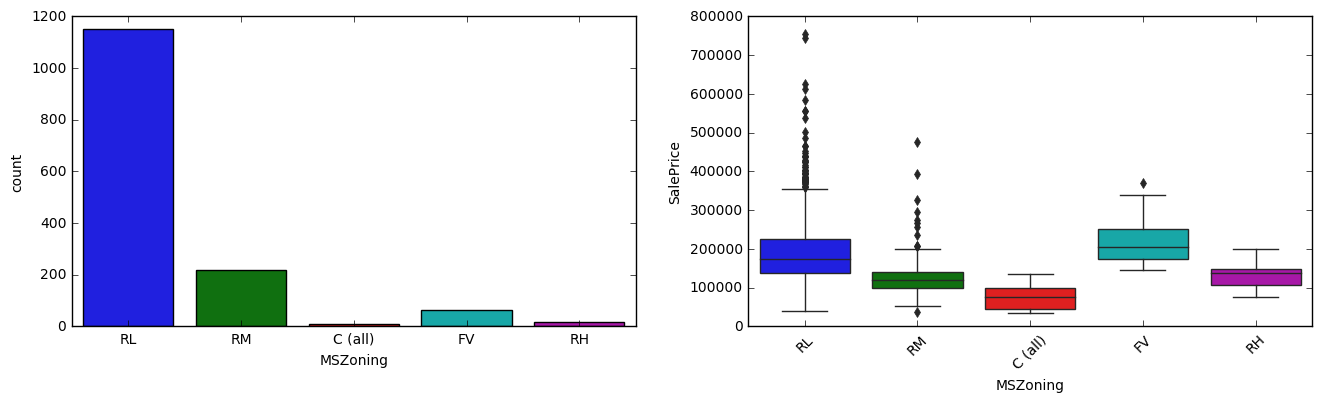

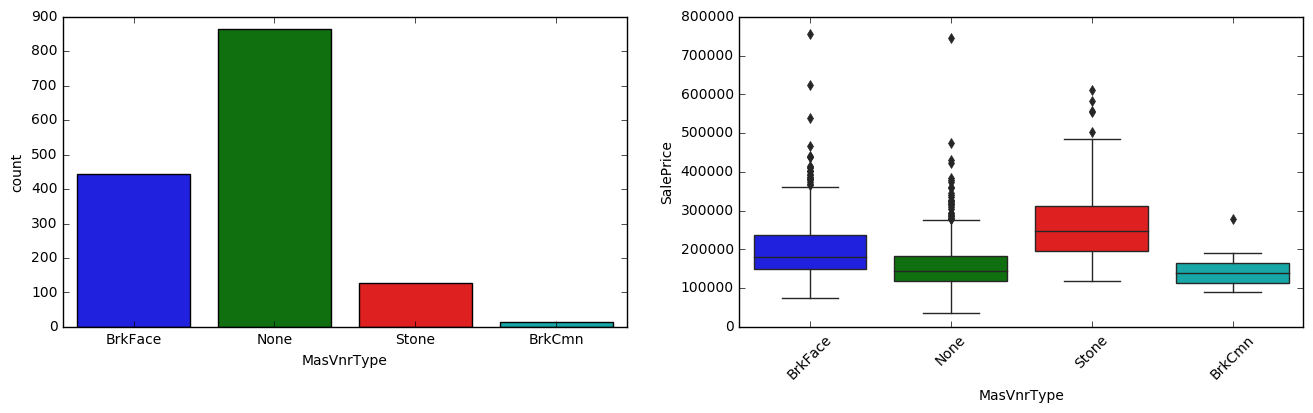

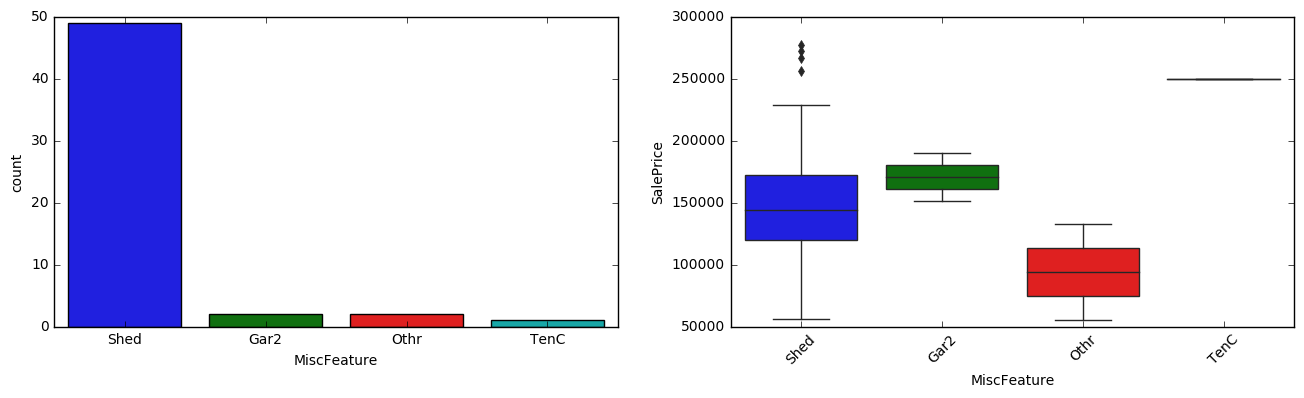

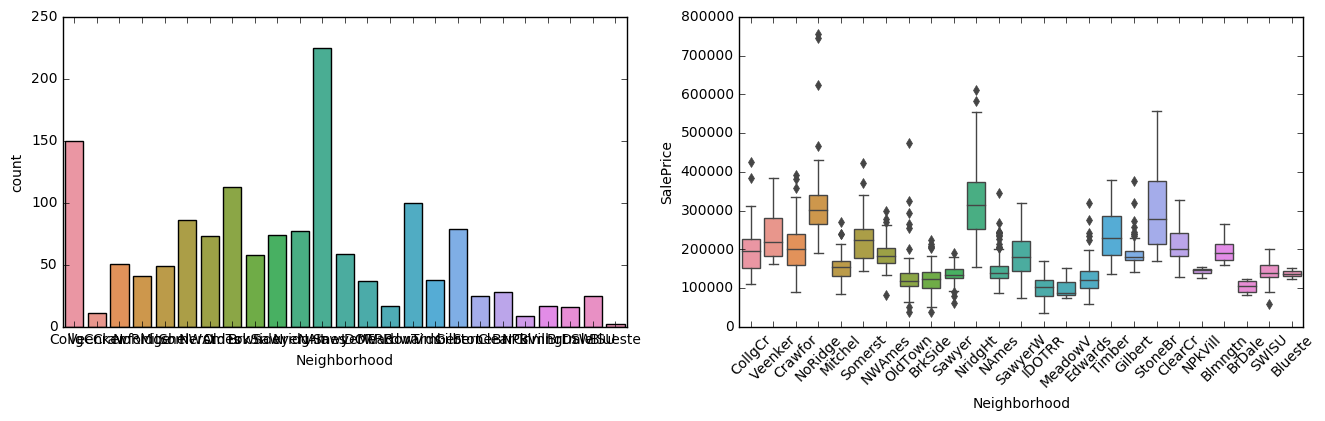

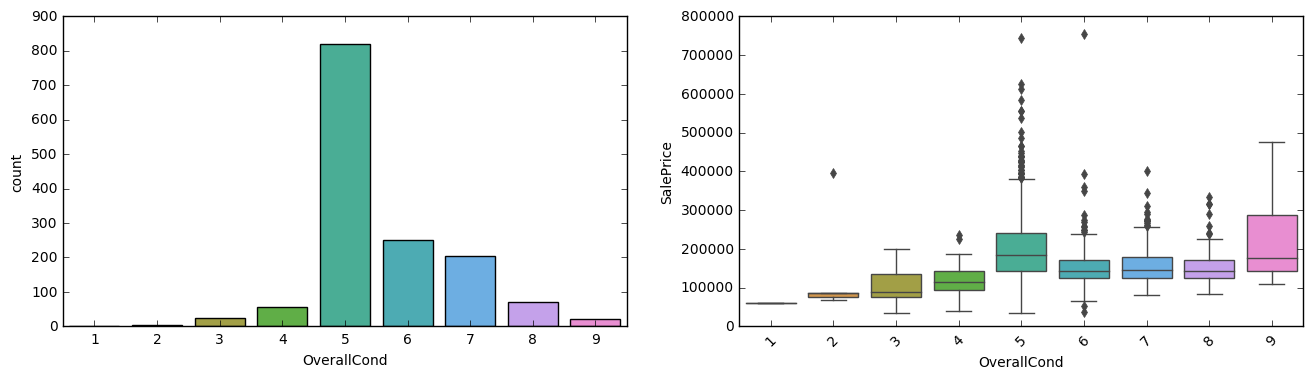

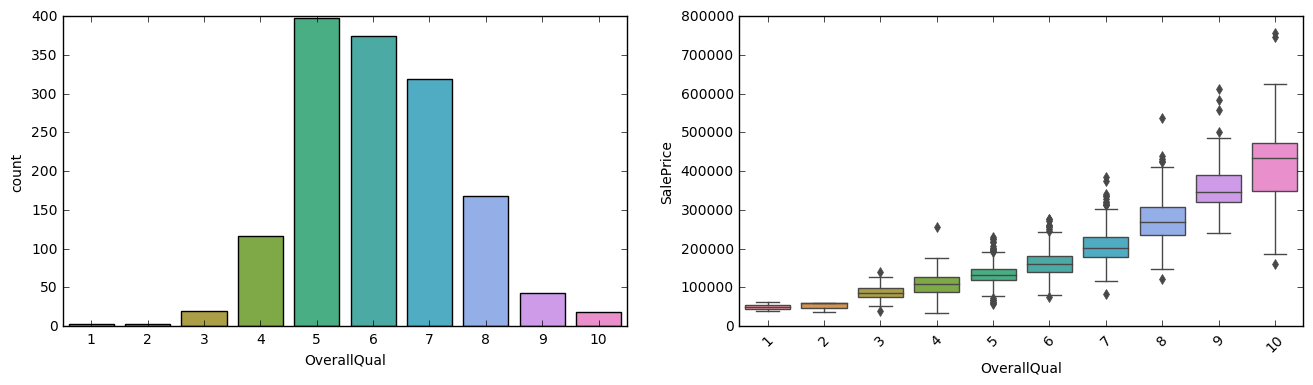

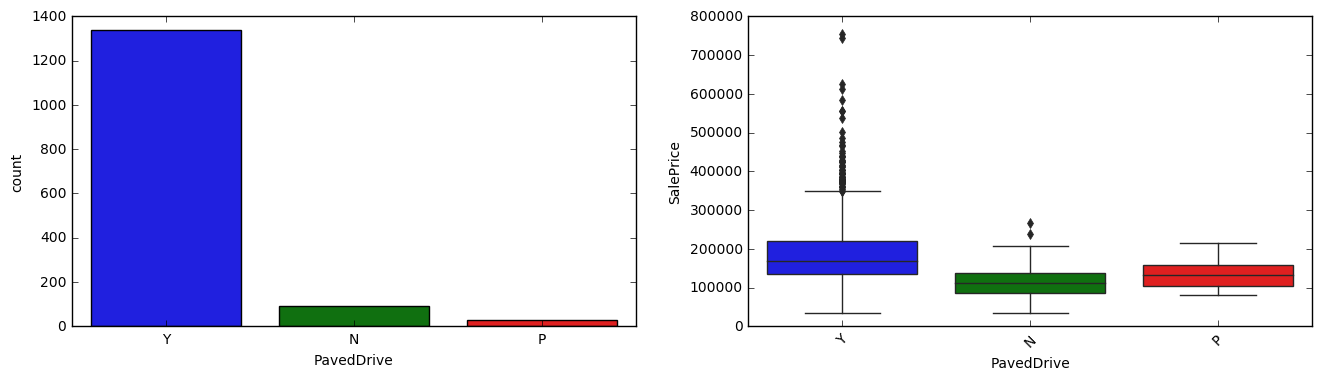

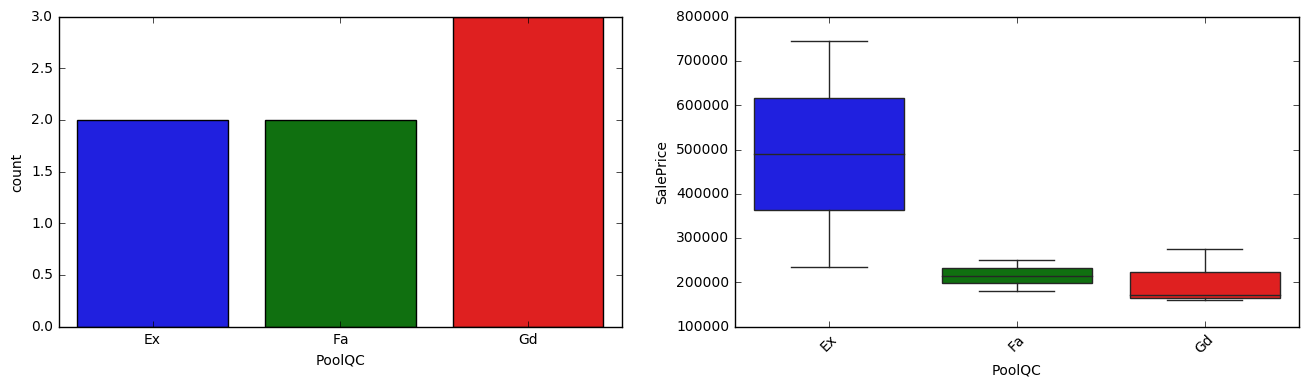

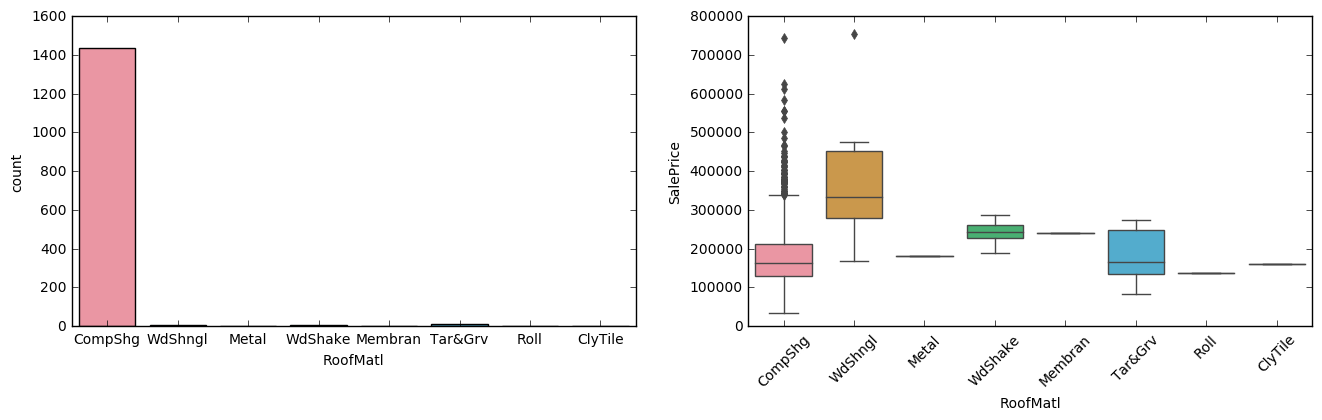

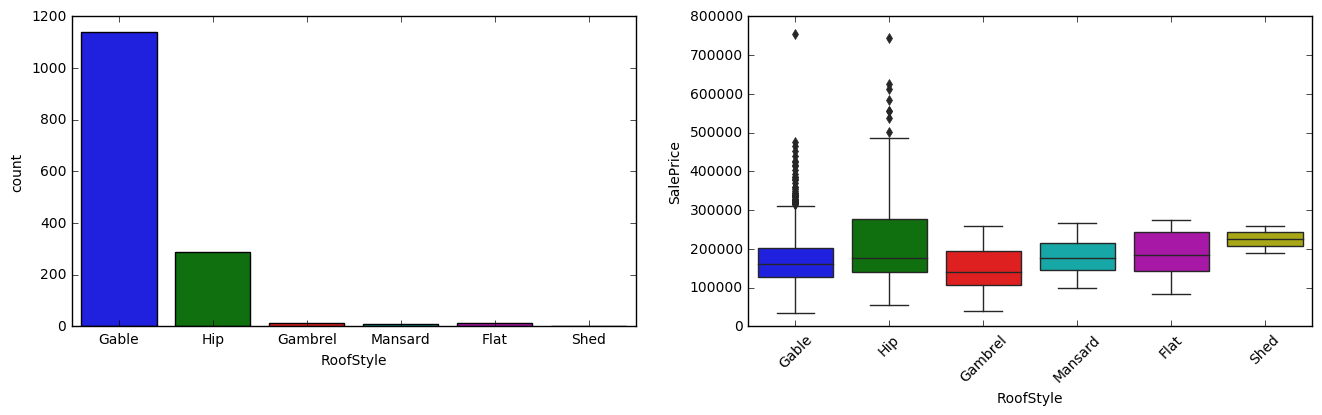

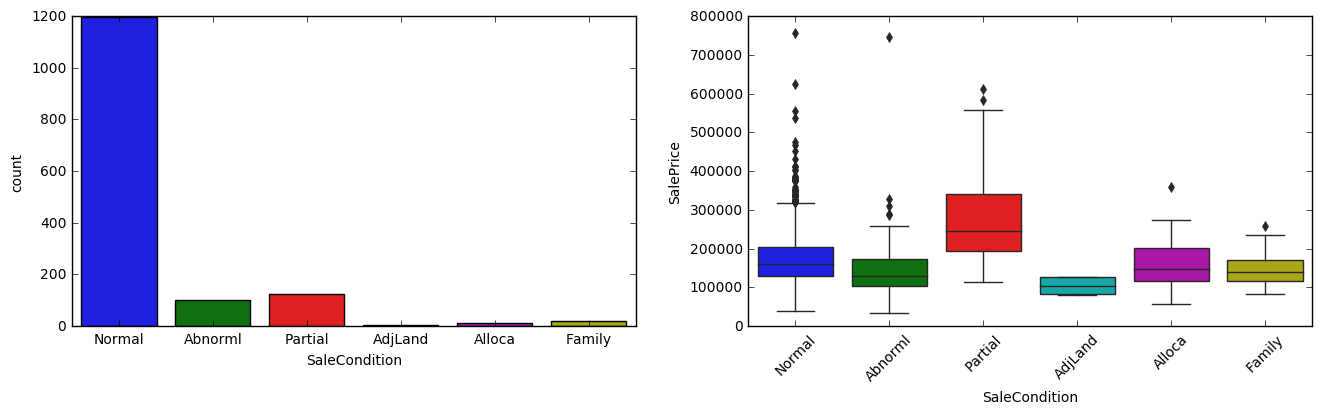

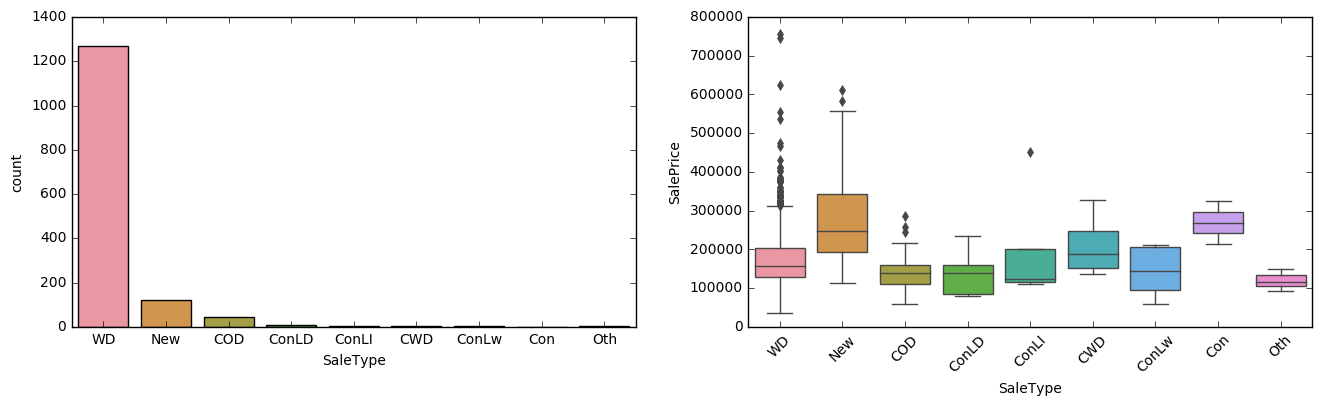

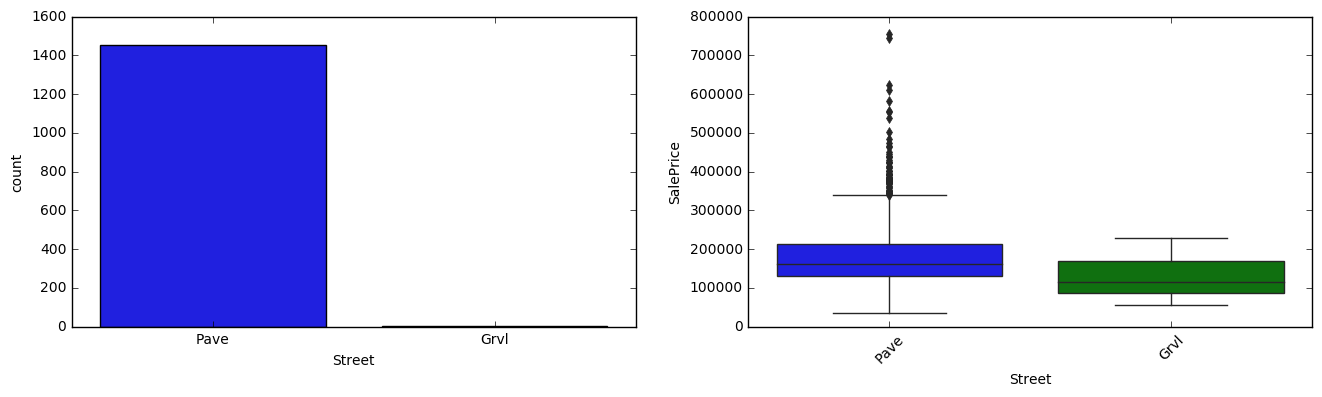

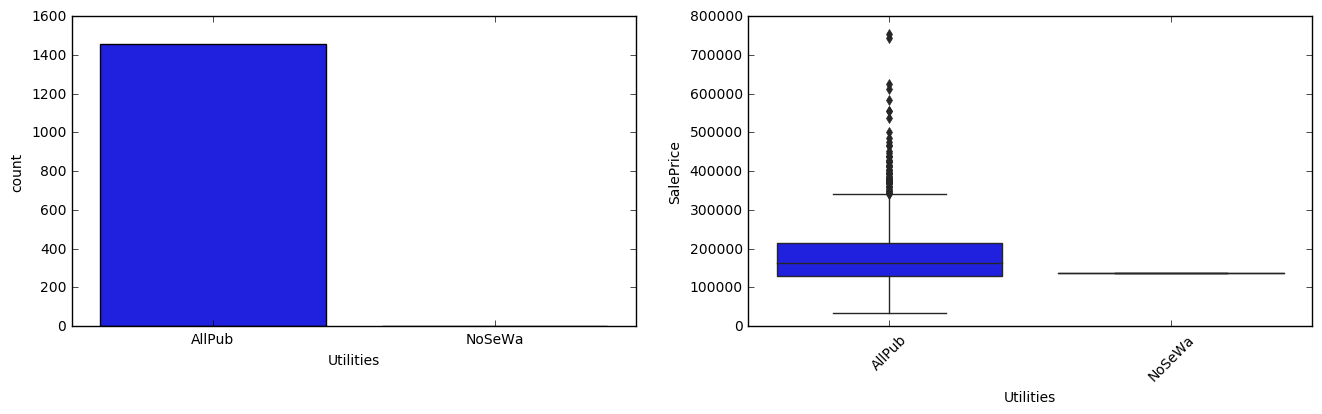

In [26]:
for category in categorical_full:
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4))
    sns.countplot(x = category, data = df, ax=ax1)
    xt = plt.xticks(rotation=45)
    sns.boxplot(x = category, y = 'SalePrice',  data = df, ax=ax2)
    xt = plt.xticks(rotation=45)
    plt.show()

## D. Time variables:

Among the 79 predictors in our data sets, there are 3 time variables: `YearBuilt` (Original construction date), `YearRemodAdd` (Remodel date), `YrSold` (Year Sold), and `GarageYrBlt` (Garage construction date). We'll use these to explore if there is any time trend in `SalePrice`.

In [27]:
yearfeature=pd.DataFrame({'Price':df['SalePrice'], 'Built': numeric['YearBuilt'],'Remod': numeric['YearRemodAdd'], 'Sold': numeric['YrSold'], 'Garage':numeric['GarageYrBlt']})

In [28]:
y1=yearfeature.sort(['Built'])
y2=yearfeature.sort(['Remod'])
y3=yearfeature.sort(['Sold'])
y4=yearfeature.sort(['Garage'])
y1g = y1.groupby('Built')['Price'].mean()
y2g = y2.groupby('Remod')['Price'].mean()
y3g = y3.groupby('Sold')['Price'].mean()
y4g = y4.groupby('Garage')['Price'].mean()

C:\Users\zhengguo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\zhengguo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
C:\Users\zhengguo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\zhengguo\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


#### `YearBuilt`

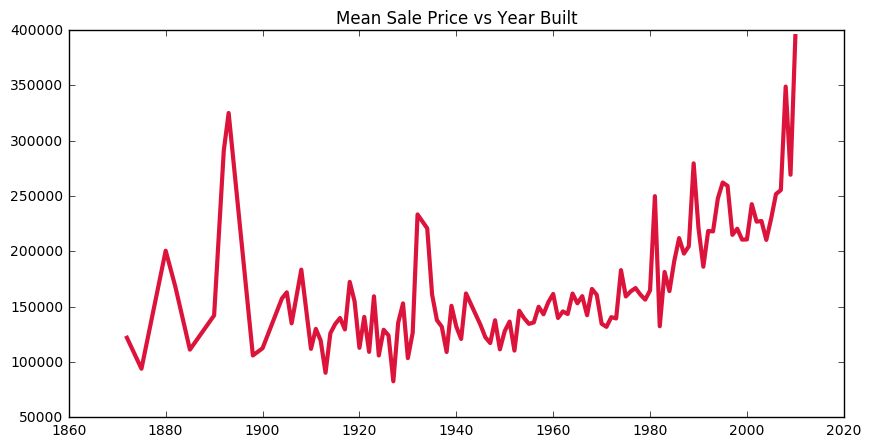

In [29]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y1g.index.values,y1g, color='crimson',linewidth=3)
plt.title("Mean Sale Price vs Year Built")
plt.show()

#### `YearRemodAdd`

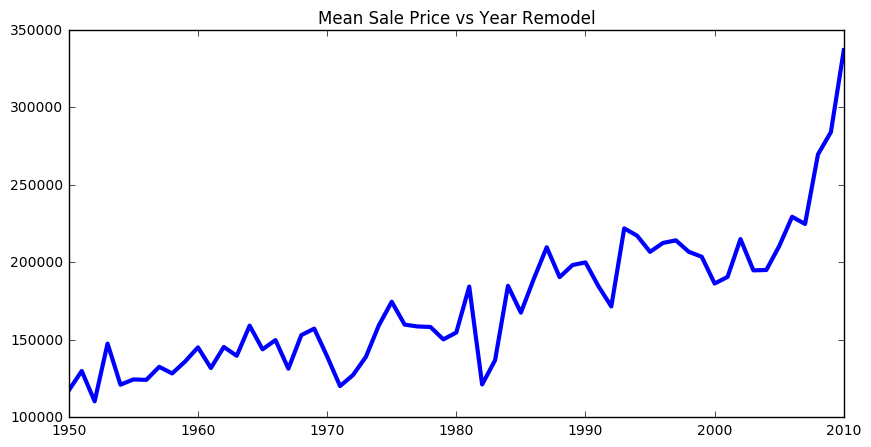

In [30]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y2g.index.values,y2g, color='blue',linewidth=3)
plt.title("Mean Sale Price vs Year Remodel")
plt.show()

#### `YrSold`

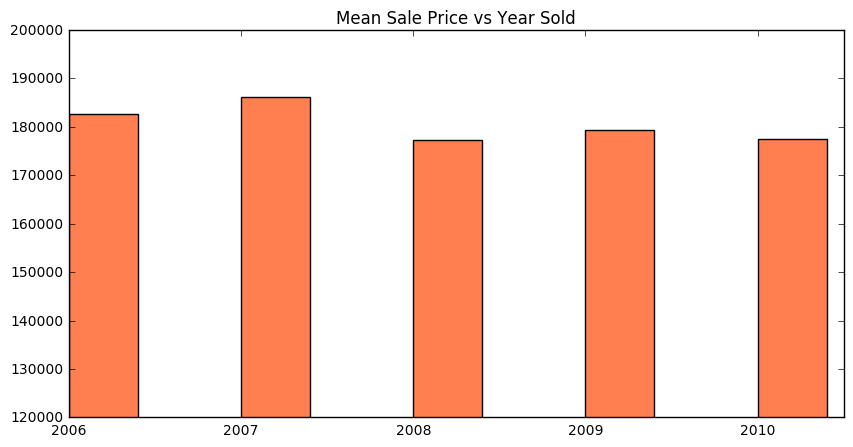

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
width = 0.4 
ax.bar(y3g.index.values,y3g,width,color='coral')
ax.set_title("Mean Sale Price vs Year Sold")
ax.set_ylim(120000,200000)
ax.set_xticks(y3g.index.values)
ax.set_xticklabels(('2006', '2007', '2008', '2009', '2010'))
plt.show()

#### `GarageYrBlt`

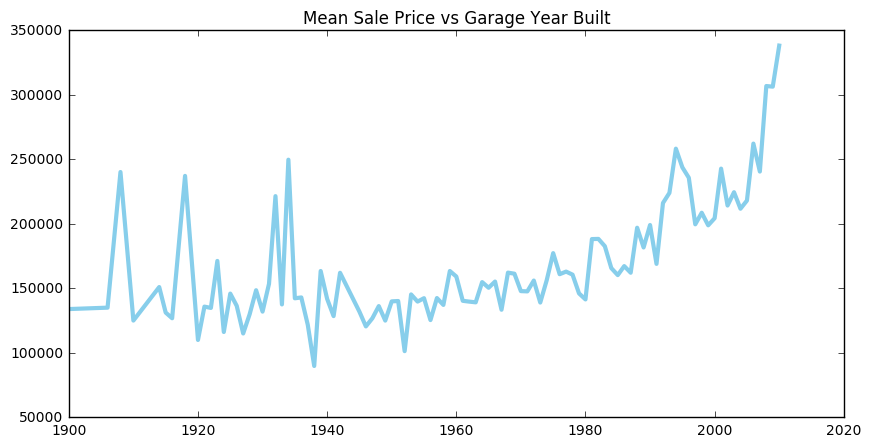

In [32]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y4g.index.values,y4g, color='skyblue',linewidth=3)
plt.title("Mean Sale Price vs Garage Year Built")
plt.show()

1. From the first graph, it looks like newer built houses generally sell for higher prices, with some exceptions.
2. From the second graph, we can tell that newer the renovation of houses, the higher its sale price.
3. From the third graph, we can tell that in general there is no strong trend in the sale price of a house in relations to the year it is sold in. However, we do see a little dip in the year of 2008 which might be a result of the general economic downturn. 
4. The fourth graph tells us that from 1940 onwards, houses with newer garages tend to sell for higher prices.

----------

# 1. Data Preprocessing

In [4]:
# import data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Removing Outliers
According to suggestion in the original paper for this dataset,three of them are true outliers (partial sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). We removed houses which have more than 4000 square feet of living area.

In [5]:
# suggested by the description of this dataset, we remove the 4 points which have more than 4000 sqrt GrLivArea
df = df[df.GrLivArea < 4000]# predictors
saleprice=df[df.GrLivArea < 4000].SalePrice# dependent variable

# concatenate train and test dataset for further data processing
df_all = pd.concat([df[df.columns[:-1]], df_test])
ID_test = df_test.Id

In [6]:
# List of different kinds of variables
nominal_col=["MSSubClass", "MSZoning", "Street","Alley", "LotShape","LandContour","LotConfig","Neighborhood","Condition1","Condition2","BldgType",
             "RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","Heating","CentralAir","GarageType","MiscFeature",
             "SaleType","SaleCondition"]
ordinal_col=["Utilities","LandSlope","HouseStyle","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
             "BsmtFinType1","BsmtFinType2","HeatingQC","Electrical","KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual",
             "GarageCond","PavedDrive","PoolQC","Fence"]
discrete_col=["YearBuilt","YearRemodAdd","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
              "Fireplaces","GarageYrBlt","GarageCars","MoSold","YrSold"]
continous_col=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF",
               "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]


## Identify predictors with 'NaN' as a category
One thing special about the Ames dataset according to its original paper is that for some categorical variables such as ‘Alley’ and ‘BsmtExposure’,
‘NA’ is a legitimate category meaning ‘Not Apply’ rather than indicating a missing value. We renamed those categories as ‘Not Apply’, so that the category name won’t be confused with missing value ‘NA’.

In [7]:
# add values in those columns which have NaN as a category
NA_as_category = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
                 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for col in df_all:
    if col in NA_as_category:
        df_all.loc[df_all[col].isnull(), col] = 'Not Apply'

## Fill missing values

### 1. Numerical: Fill missing values by multi-linear regression

In [8]:
# find and store indexes for columns with no missing values or with missing values
no_missing_value_column_list = []
missing_value_column_list = []
for col in df_all:
    if col in (discrete_col + continous_col):
        if sum(pd.isnull(df_all[col])) == 0:
            no_missing_value_column_list += [col]
        else:
            missing_value_column_list += [col]

In [9]:
# take out all columns which have no missing value 

# for each column with missing values, use those patients with values to train and predict missing 
# values with multiple linear regression

# as encoded categorical variables are highly correlated, to avoid overfitting, use only numerical 
# predictors to fit missing values with multiple linear regression

array_full_values = df_all[no_missing_value_column_list] # array with no missing values for training dataset
from sklearn.linear_model import LinearRegression as LinReg
line = []# to store multiple linear regression models

index = 0
for i in missing_value_column_list:
    x_missing_value = array_full_values.loc[~pd.isnull(df_all[i])]
    y_missing_value = df_all.loc[~pd.isnull(df_all[i]), i]
    x_missing_train = array_full_values.loc[pd.isnull(df_all[i])]
    line += [LinReg()]
    line[index].fit(x_missing_value, y_missing_value)
    df_all.loc[pd.isnull(df_all[i]), i] = line[index].predict(x_missing_train)
    index += 1
    df_all.loc[df_all[i] < 0, i] = 0

### 2. Categorical: Fill in missing values using ‘Not Apply’ 
We first use mode (most frequent) to fill in missing values in categorical features, and than realize these may cause more bias as some houses may not very likely has that feature, for example garden and alley. 

Since the missing percentage for categotical features are very low (around 5%), we can also assume the categorical feature is not applicable for certain observations with missing value.

After using 'Not Apply' instead of mode, the performance of our models got improved.

In [10]:
# fill in missing values in categorical columns with a new category 'Missing'
categorical_col = ordinal_col + nominal_col
for col in categorical_col:
    df_all.loc[pd.isnull(df_all[col]), col] = 'Not Apply'

In [11]:
#Check if all missing value are filled
n_missing=[]
p=[]
for col in df_all:
    n_missing.append(df_all[col].isnull().values.sum())
    p.append((df_all[col].isnull().values.sum())/float(df_all.shape[0]))
missing=pd.DataFrame({'Features': df_all.columns.values, 'Missing':n_missing, 'Missing Precentage':p })
print "Number of missing values"
missing[missing['Missing']!=0]

Number of missing values


Empty DataFrame
Columns: [Features, Missing, Missing Precentage]
Index: []

In [41]:
df_all.shape

(2915, 80)

## Encode categorical variable as dummy variables 

In [12]:
nominal = df_all[nominal_col]
ordinal = df_all[ordinal_col]
discrete = df_all[discrete_col]
continuous = df_all[continous_col]

temp_nominal=pd.get_dummies(nominal)
temp_ordinal = pd.get_dummies(ordinal)
result = pd.concat([discrete, continuous, temp_nominal, temp_ordinal], axis=1)

In [43]:
result.shape

(2915, 310)

## Log Transformations

### 1. Log Transformation on Target Variable
As the distribution of our target variable ‘Sale Price’ is highly right skewed, we transformed it to log scale. The distribution after transformation is approximately normal. 
##### Before log transformation

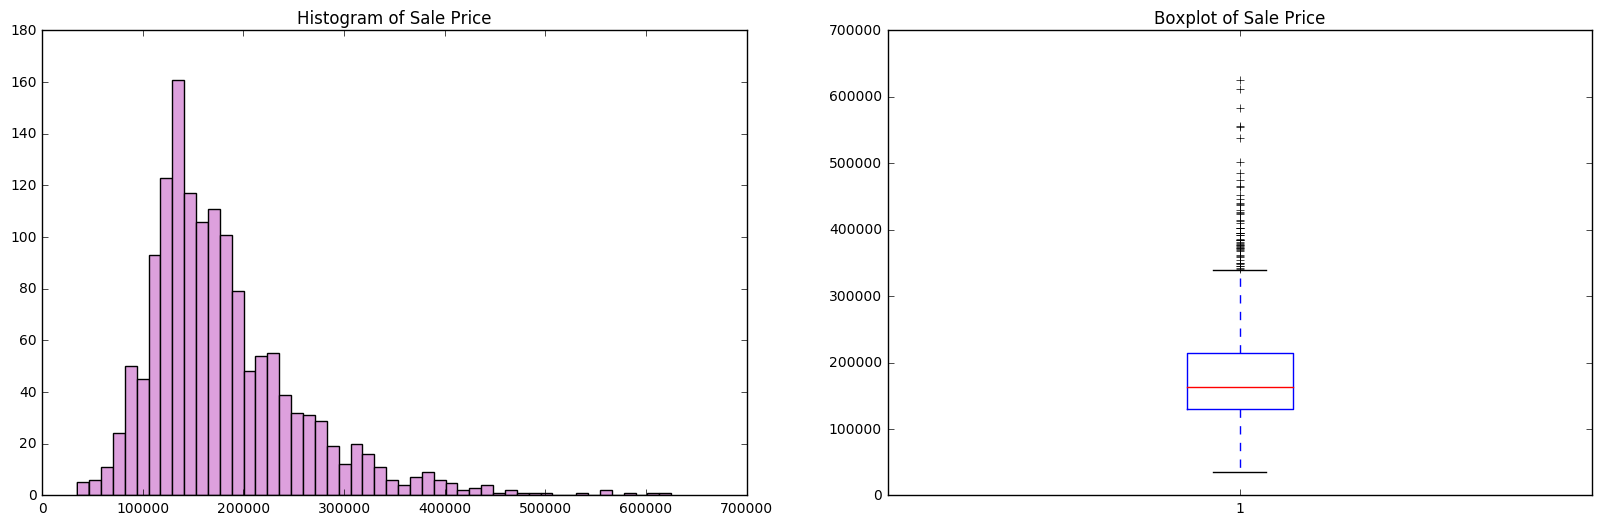

In [44]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.hist(df['SalePrice'],bins=50,color='plum')
ax2.boxplot(df['SalePrice'])

ax1.set_title("Histogram of Sale Price")
ax2.set_title("Boxplot of Sale Price")
plt.show()

##### After log transformation

In [13]:
logprice = saleprice.apply(lambda x: math.log(x))

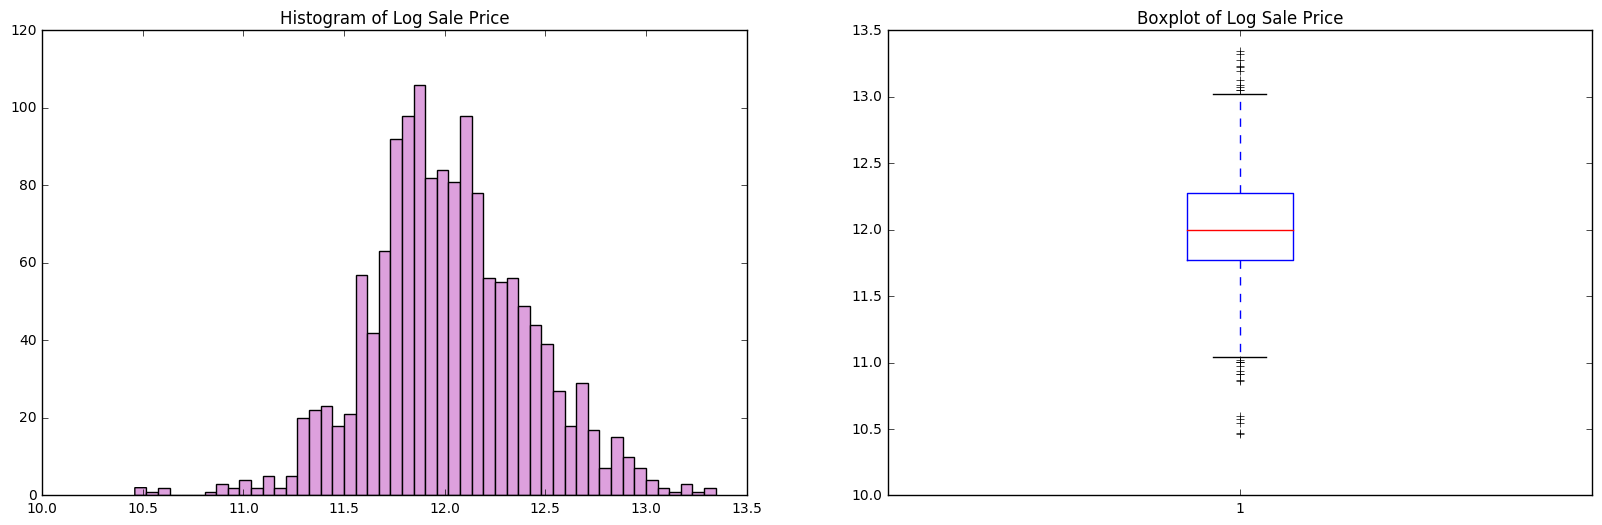

In [46]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.hist(logprice,bins=50,color='plum')
ax2.boxplot(logprice)
ax1.set_title("Histogram of Log Sale Price")
ax2.set_title("Boxplot of Log Sale Price")
plt.show()

### 2. Log Transformation on selected features

We also log transformed some numerical features that has high skewness

In [14]:
# decrease skewness of numerical predictors which have a skewness value of more than 0.5
from scipy.stats import skew
skew_list_name = []
skew_list_val = []
for col in result:
    if col in (discrete_col + continous_col):
        if skew(result[col]) > 0.5:
            skew_list_name += [col]
            skew_list_val += [skew(result[col])]
            result[col] = result[col].apply(np.log1p)

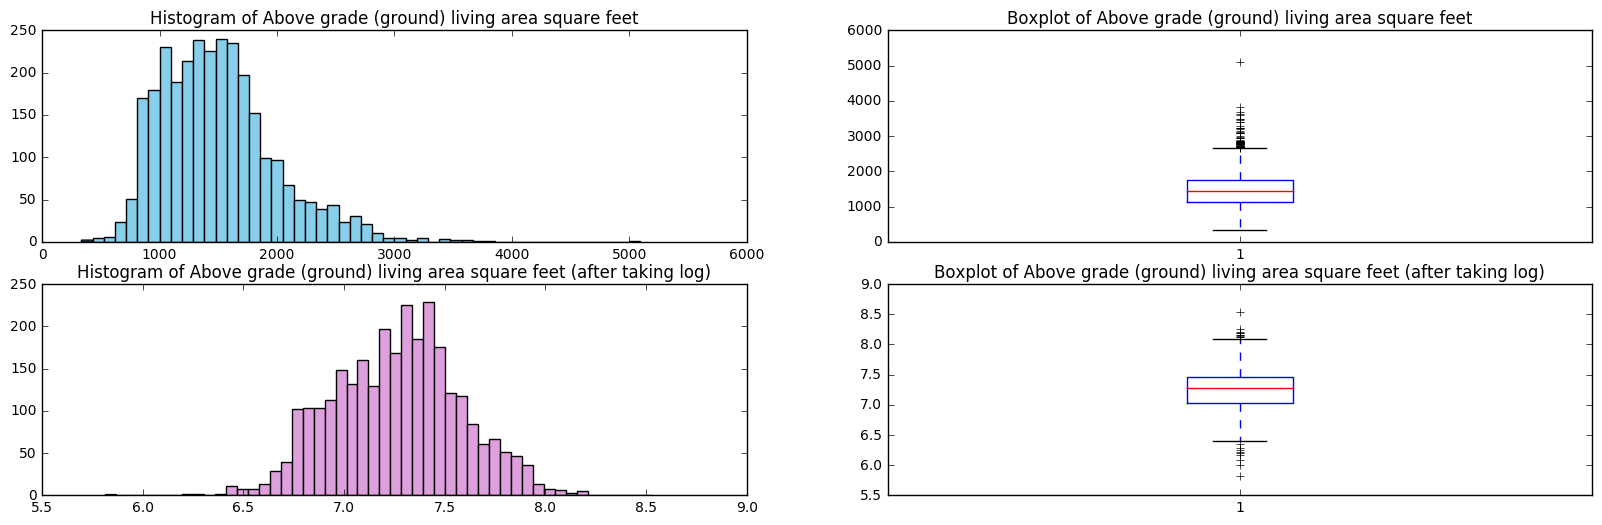

In [48]:
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 6))
ax1.hist(df_all['GrLivArea'],bins=50,color='skyblue')
ax2.boxplot(df_all['GrLivArea'])
ax1.set_title("Histogram of Above grade (ground) living area square feet")
ax2.set_title("Boxplot of Above grade (ground) living area square feet")

ax3.hist(result['GrLivArea'],bins=50,color='plum')
ax4.boxplot(result['GrLivArea'])
ax3.set_title("Histogram of Above grade (ground) living area square feet (after taking log)")
ax4.set_title("Boxplot of Above grade (ground) living area square feet (after taking log)")

plt.show()

As can be seen from above image, after log-transformation, the variable is more normally distributed

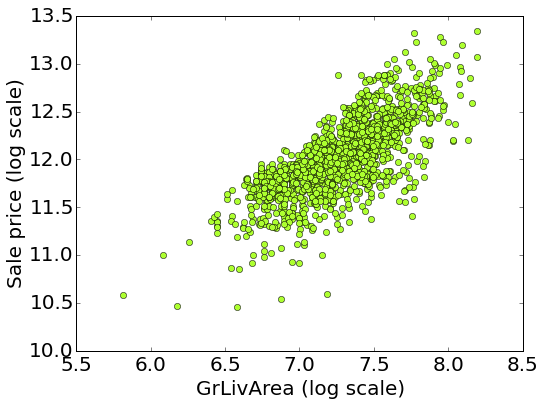

In [21]:
y = logprice.values
f, ax1 = plt.subplots(1,1, figsize = (8, 6))
ax1.plot(result['GrLivArea'][:1456],y,'o',color='greenyellow')
# ax1.set_title('Sale price VS Above grade (ground) living area')
ax1.set_ylabel('Sale price (log scale)', fontsize = 20)
ax1.set_xlabel('GrLivArea (log scale)', fontsize = 20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

plt.show()

## Adding quadratic and cubic terms

We identified that some features has non-linear/curvilinear relationship with target variable, so we add in quadratic and cubic terms in the model in order to adjust for curvature.

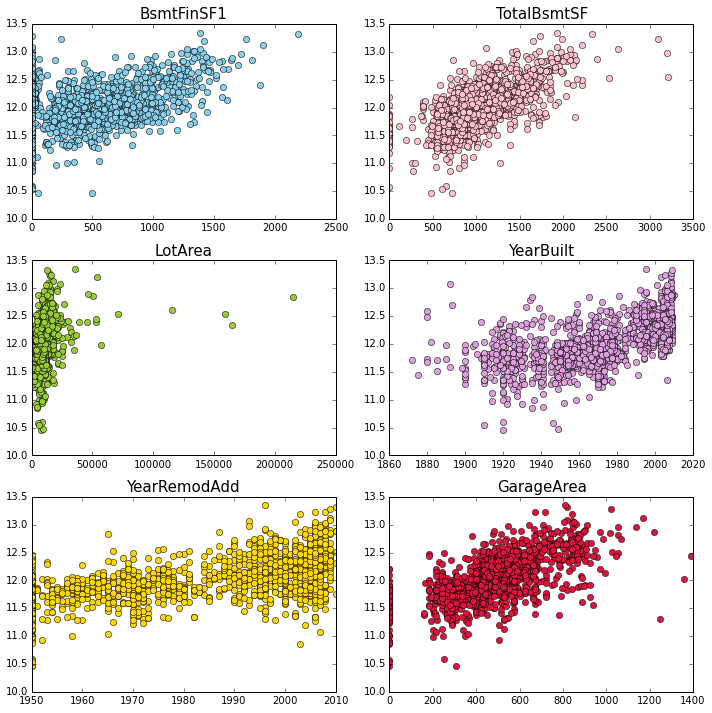

In [22]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 10))
ax1.set_title('BsmtFinSF1',fontsize=15)
ax1=ax1.plot(df['BsmtFinSF1'].values,y,'o',color='skyblue')
ax2.set_title('TotalBsmtSF',fontsize=15)
ax2=ax2.plot(df['TotalBsmtSF'].values,y,'o',color='pink')
ax3.set_title('LotArea',fontsize=15)
ax3=ax3.plot(df['LotArea'].values,y,'o',color='yellowgreen')
ax4.set_title('YearBuilt',fontsize=15)
ax4=ax4.plot(df['YearBuilt'].values,y,'o',color='plum')
ax5.set_title('YearRemodAdd',fontsize=15)
ax5=ax5.plot(df['YearRemodAdd'].values,y,'o',color='gold')
ax6.set_title('GarageArea',fontsize=15)
ax6=ax6.plot(df['GarageArea'].values,y,'o',color='crimson')
plt.tight_layout()
plt.show()

In [18]:
# add quadratic and cubic terms to selected numerical predictors
top_ten = ['LotArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1', 'GarageCars', 'YearRemodAdd', 'GarageArea']
addon_numeric = []
for col in top_ten:
    new_name = 'sqrt_' + col
    addon_numeric += [new_name]
    result[new_name] = result[col] ** 2
    new_name = 'cubic_' + col
    addon_numeric += [new_name]
    result[new_name] = result[col] ** 3

In [19]:
#split train and test dataset
df_train = result[:1456]
df_test = result[1456:]

In [20]:
from sklearn.preprocessing import StandardScaler
scalar_fit = StandardScaler().fit(result)
X_train = scalar_fit.transform(df_train)
X_test = scalar_fit.transform(df_test)

------------------

# 3. Modeling

## Define evaluation RMSE function 

In [54]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV,Lasso
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

## (1) Ridge Regression

In [55]:
num_lambdas = 100
lambdas= np.linspace(-7,7, num_lambdas)

cv_ridge = [rmse_cv(Ridge(alpha = 10**i)).mean() 
            for i in lambdas]

Lasso Regression: min RMSE on training set 0.112401962218


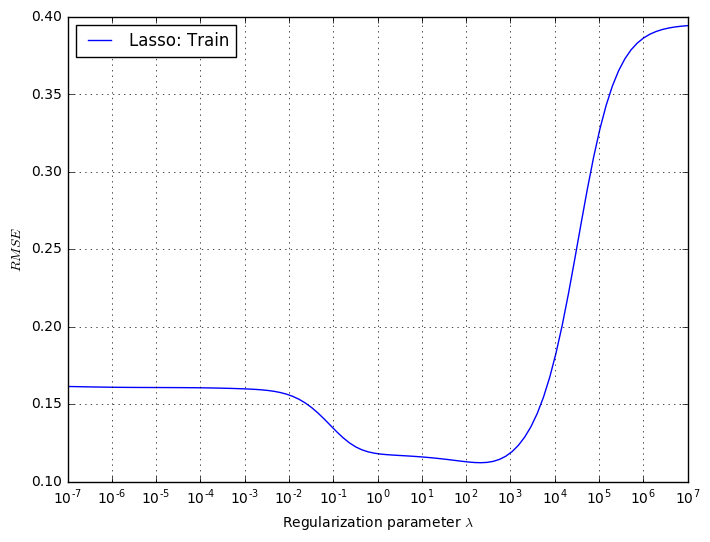

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.semilogx(10.0**lambdas, (cv_ridge), c='b', label='Lasso: Train')

ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$RMSE$')

ax.grid()
ax.legend(loc = 'best')

print 'Lasso Regression: min RMSE on training set', min(cv_ridge)

In [57]:
# Finding the best lambda with greater precision near the minimum 
min_value = min(cv_ridge)
min_index = cv_ridge.index(min_value)
best_value = lambdas[min_index]
num_lambdas = 100
lambdas= np.linspace(best_value -0.3 , best_value + 0.3, num_lambdas)

cv_ridge = [rmse_cv(Ridge(alpha = 10**i)).mean() 
            for i in lambdas]

Lasso Regression: min RMSE on training set 0.112401422467


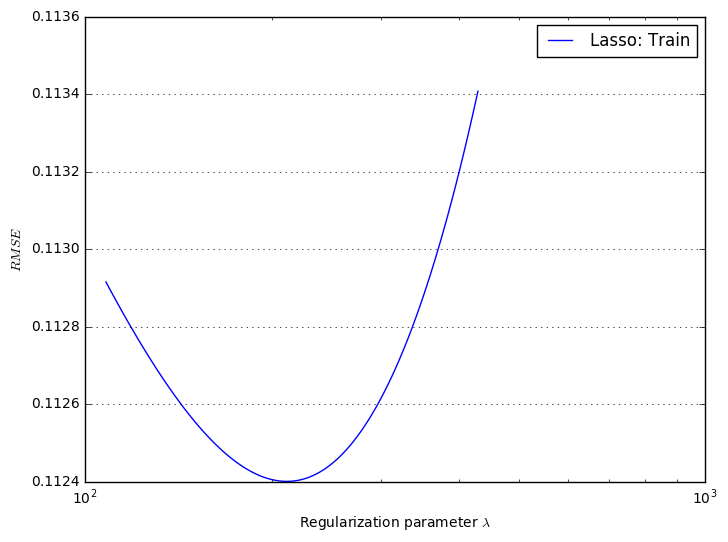

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.semilogx(10.0**lambdas, (cv_ridge), c='b', label='Lasso: Train')

ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$RMSE$')

ax.grid()
ax.legend(loc = 'best')

print 'Lasso Regression: min RMSE on training set', min(cv_ridge)

### Result of the Best Ridge Model:

In [59]:
min_value = min(cv_ridge)
min_index = cv_ridge.index(min_value)

In [60]:
print "Lambda for min RMSE:", lambdas[min_index]

Lambda for min RMSE: 2.32424242424


In [61]:
best_ridge=Ridge(alpha = 10**(lambdas[min_index])).fit(X_train, y)

In [62]:
print "Min RMSE for Ridge Model:", rmse_cv(best_ridge).mean()

Min RMSE for Ridge Model: 0.112401422467


In [63]:
coef = pd.Series(best_ridge.coef_, index = result.columns)
newcoef=pd.DataFrame(coef)
newcoef_sorted = newcoef.sort_values(by=[0], ascending=[False])
imp_coef = pd.concat([newcoef_sorted.head(10),
                     newcoef_sorted.tail(10)])

In [64]:
color_selection = ['lightslategray','darkseagreen','palevioletred','gold','coral','skyblue','darkseagreen','palevioletred','gold','coral','skyblue','darkseagreen','palevioletred','gold','tan','lightslategray','darkseagreen','palevioletred','gold','coral']

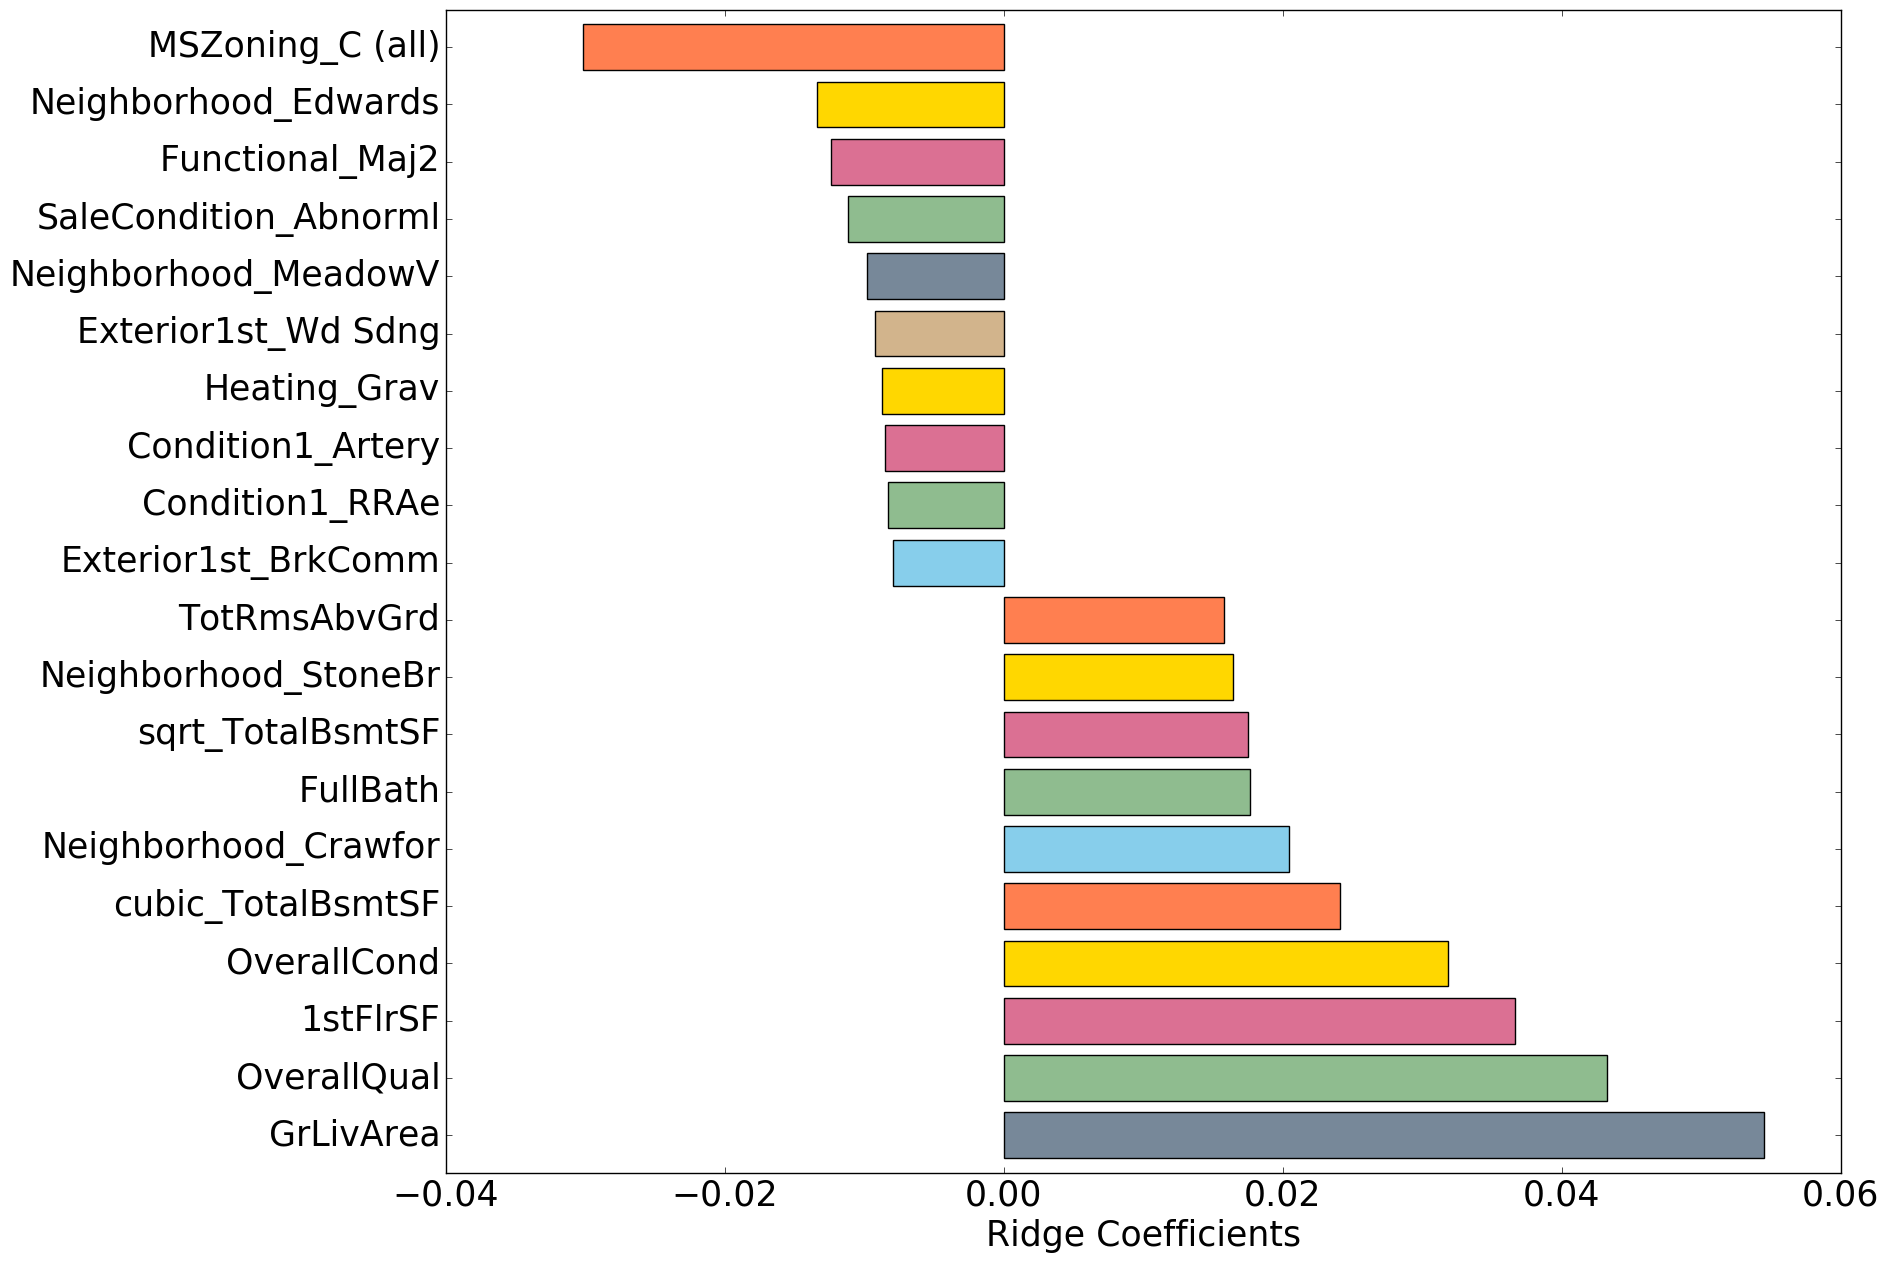

In [65]:
matplotlib.rcParams['figure.figsize'] = (18.0, 15.0)
imp_coef.plot(kind = "barh", color=color_selection,width = 0.8, legend=None, fontsize = 25)
plt.xlabel('Ridge Coefficients', fontsize = 25)

plt.show()

### Get Prediction on test set

In [66]:
# Predict with our constructed Ridge model
y_pred = best_ridge.predict(X_test)
y_pred_mlr = 2.71828 ** y_pred
result_predict = pd.DataFrame({'Id': ID_test.values, 'SalePrice': y_pred_mlr})
result_predict.to_csv('RIDGE.csv', header=True,  index = False)

------------------------------

## (2) LASSO Model

In [67]:
num_lambdas = 100
lambdas= np.linspace(-7,7, num_lambdas)

cv_lasso = [rmse_cv(Lasso(alpha = 10**i)).mean() 
            for i in lambdas]

C:\Users\zhengguo\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso Regression: min RMSE on training set 0.107866455405


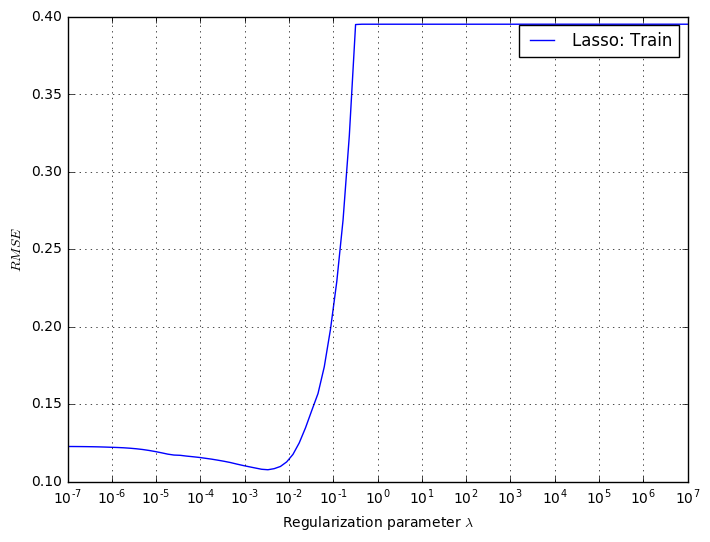

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.semilogx(10.0**lambdas, (cv_lasso), c='b', label='Lasso: Train')

ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$RMSE$')

ax.grid()
ax.legend(loc = 'best')

print 'Lasso Regression: min RMSE on training set', min(cv_lasso)

In [69]:
# Finding the best lambda with greater precision near the minimum 
min_value = min(cv_lasso)
min_index = cv_lasso.index(min_value)
best_value = lambdas[min_index]
num_lambdas = 100
lambdas= np.linspace(best_value -0.3 , best_value + 0.3, num_lambdas)

cv_lasso = [rmse_cv(Lasso(alpha = 10**i)).mean() 
            for i in lambdas]

Lasso Regression: min RMSE on training set 0.107849921241


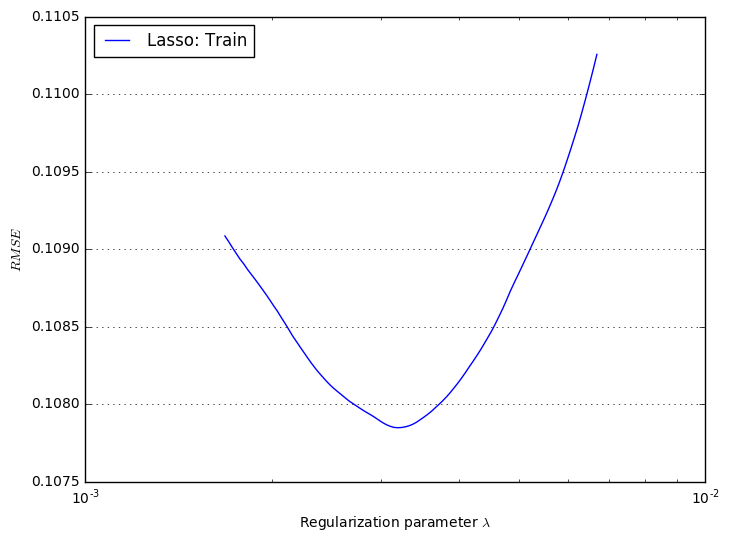

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.semilogx(10.0**lambdas, (cv_lasso), c='b', label='Lasso: Train')

ax.set_xlabel('Regularization parameter $\lambda$')
ax.set_ylabel(r'$RMSE$')

ax.grid()
ax.legend(loc = 'best')

print 'Lasso Regression: min RMSE on training set', min(cv_lasso)

### Result of Best Lasso Model:

In [71]:
min_value = min(cv_lasso)
min_index = cv_lasso.index(min_value)

In [72]:
best_lasso=Lasso(alpha = 10**(lambdas[min_index])).fit(X_train, y)

In [73]:
print "Lambda for min RMSE:", lambdas[min_index]

Lambda for min RMSE: -2.49595959596


In [74]:
print "Min RMSE for Ridge Model:", rmse_cv(best_lasso).mean()

Min RMSE for Ridge Model: 0.107849921241


In [75]:
coef = pd.Series(best_lasso.coef_, index = result.columns)

In [76]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 123 variables and eliminated the other 201 variables


In [77]:
newcoef=coef[coef != 0]
newcoef=pd.DataFrame(newcoef)
newcoef_sorted = newcoef.sort_values(by=[0], ascending=[False])
imp_coef = pd.concat([newcoef_sorted.head(10),
                     newcoef_sorted.tail(10)])

In [78]:
color_selection = ['lightslategray','darkseagreen','palevioletred','gold','coral','skyblue','darkseagreen','palevioletred','gold','coral','skyblue','darkseagreen','palevioletred','gold','tan','lightslategray','darkseagreen','palevioletred','gold','coral']

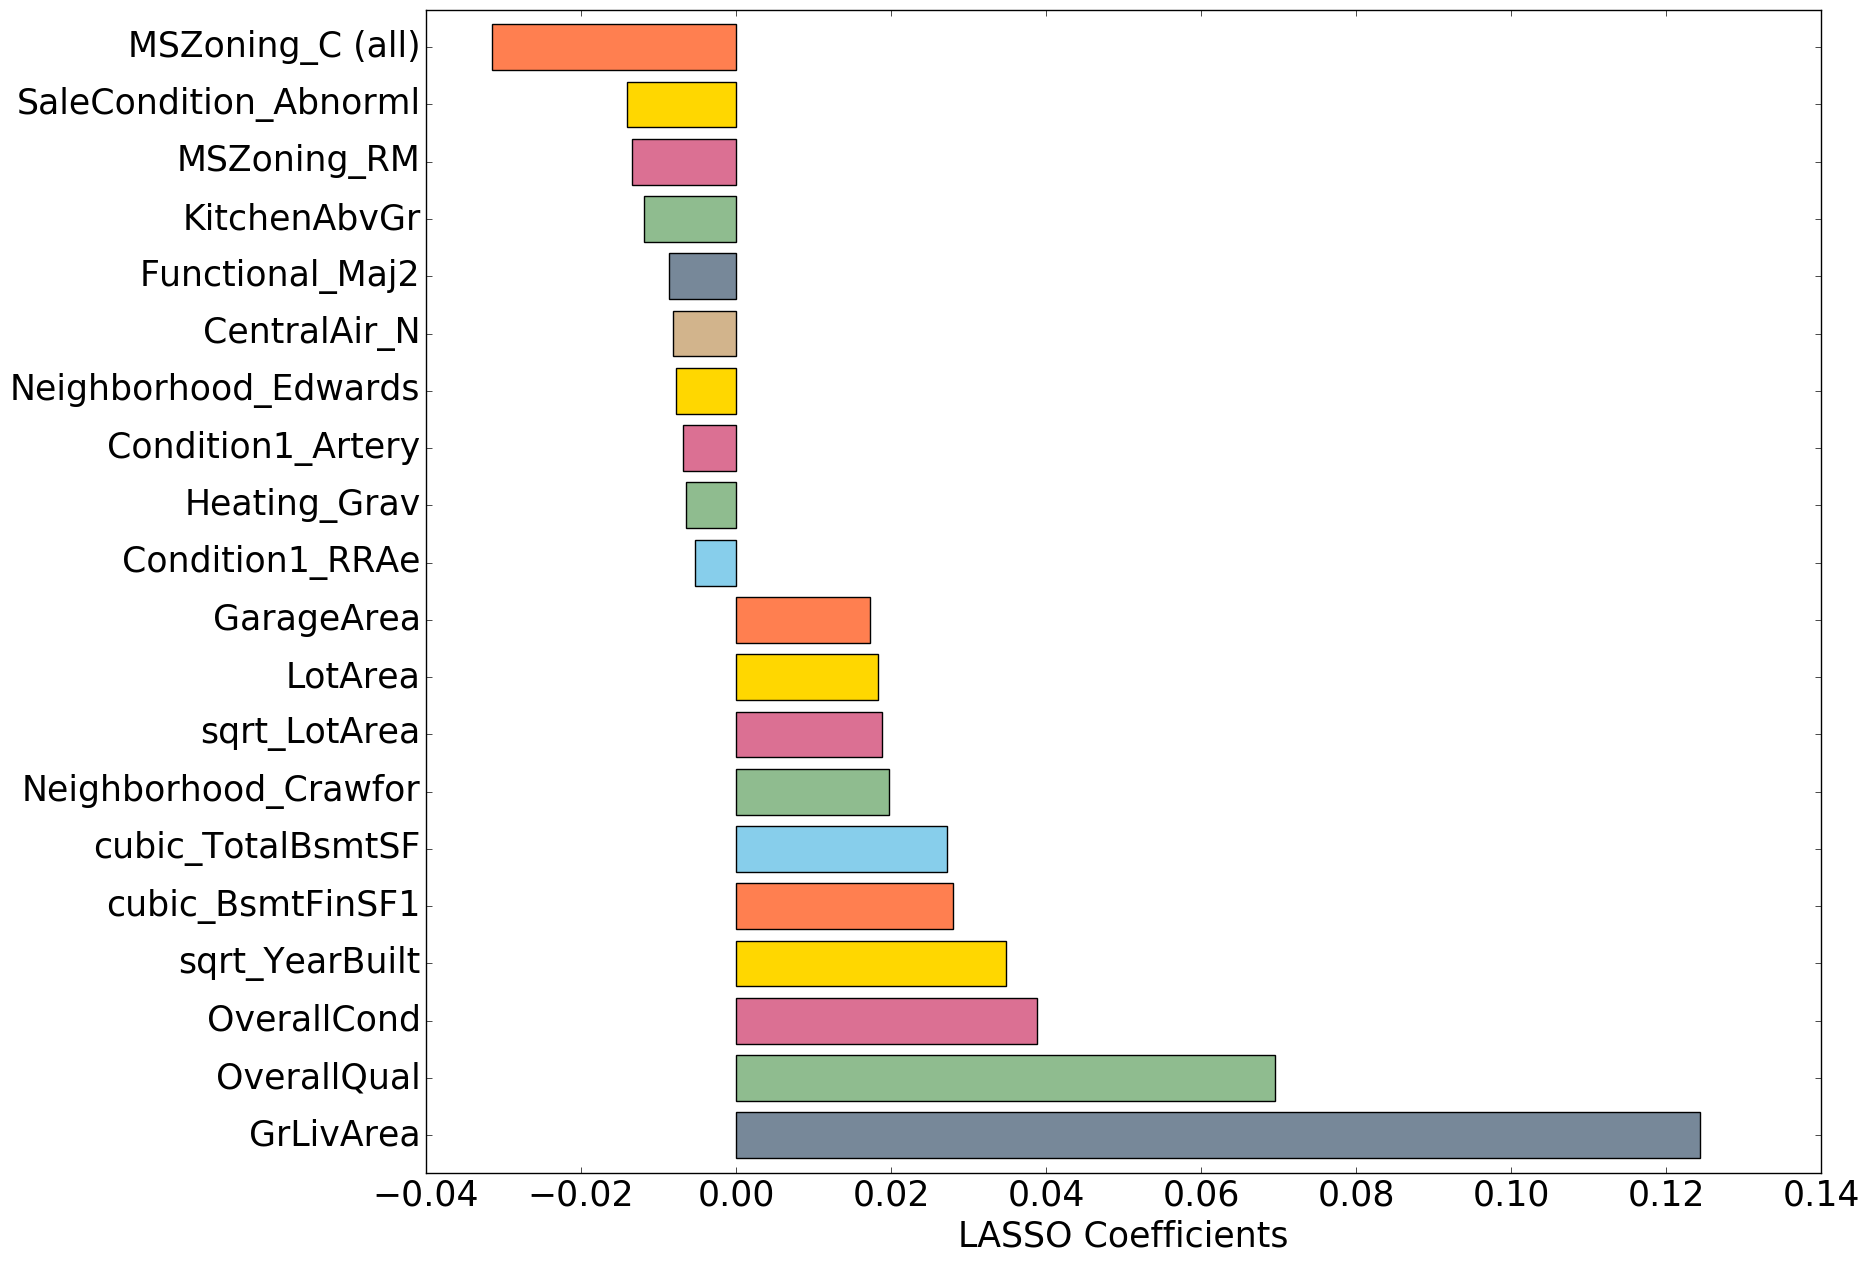

In [79]:
matplotlib.rcParams['figure.figsize'] = (18.0, 15.0)
imp_coef.plot(kind = "barh", color=color_selection,width = 0.8, legend=None, fontsize = 25)
plt.xlabel('LASSO Coefficients', fontsize = 25)
# plt.title("Coefficients in the Lasso Model")

plt.show()

### Get Prediction on test set¶

In [80]:
# Predict with our constructed LASSO model
y_pred = best_lasso.predict(X_test)
y_pred_mlr = 2.71828 ** y_pred
result_predict = pd.DataFrame({'Id': ID_test.values, 'SalePrice': y_pred_mlr})
result_predict.to_csv('LASSO.csv', header=True,  index = False)

--------------

## (3). XGBoost (eXtreme Gradient Boosting)

As suggested by Kaggle Competition, we also tried XGBoost method here.

### Reference Tutorial:
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
http://xgboost.readthedocs.io/en/latest/model.html

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm.

**The XGBoost Advantage:**

Regularization:

Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
In fact, XGBoost is also known as ‘regularized boosting‘ technique.

High Flexibility

XGBoost allow users to define custom optimization objectives and evaluation criteria.
This adds a whole new dimension to the model and there is no limit to what we can do.

Tree Pruning:

A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.


**XGBoost Parameters**

General Parameters: Guide the overall functioning

Booster Parameters: Guide the individual booster (tree/regression) at each step

Learning Task Parameters: Guide the optimization performed

In [53]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

## Parameter Tuning

1. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
2. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.

#### Step 1: Tune combination of max_depth and n_estimators

In [54]:
xgb_model = xgb.XGBRegressor(gamma=0.0,learning_rate=0.1)
clf = GridSearchCV(xgb_model,
{'max_depth':range(2,10,2),
'n_estimators': range(50,300,50)}, verbose=1)
clf.fit(X_train,y)
clf.best_score_, clf.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.7min finished


(0.90592179459939104, {'max_depth': 2, 'n_estimators': 250})

#### Step 2: Tune gamma

In [55]:
xgb_model1 = xgb.XGBRegressor(learning_rate=0.1,max_depth=2,n_estimators=250)
clf1 = GridSearchCV(xgb_model1,
{'gamma':[i/10.0 for i in range(0,5)]})
clf1.fit(X_train,y)
clf1.best_score_, clf1.best_params_

(0.90592179459939104, {'gamma': 0.0})

#### Step 3: Tune Regularization Parameters

In [64]:
xgb_model2 = xgb.XGBRegressor(gamma=0,learning_rate=0.1,max_depth=2,n_estimators=250)
clf2 = GridSearchCV(xgb_model2,
{'reg_alpha':[0.01, 0.1, 1, 100]})
clf2.fit(X_train,y)
clf2.best_score_, clf2.best_params_

(0.90565032291174274, {'reg_alpha': 0.01})

### Model Evaluation

In [23]:
df_xtrain=pd.DataFrame(data=X_train,columns=df_train.columns)

In [24]:
def modelfit(alg, dtrain, y,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain, label=y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, y,eval_metric='rmse')
                   
    #Print model report:
    print "\nModel Report"
    print "min test rmse:", cvresult.loc[:,["test-rmse-mean"]].min()
    print "min train rmse:", cvresult.loc[:,["train-rmse-mean"]].min()
               
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
min test rmse: test-rmse-mean    0.120291
dtype: float64
min train rmse: train-rmse-mean    0.082024
dtype: float64


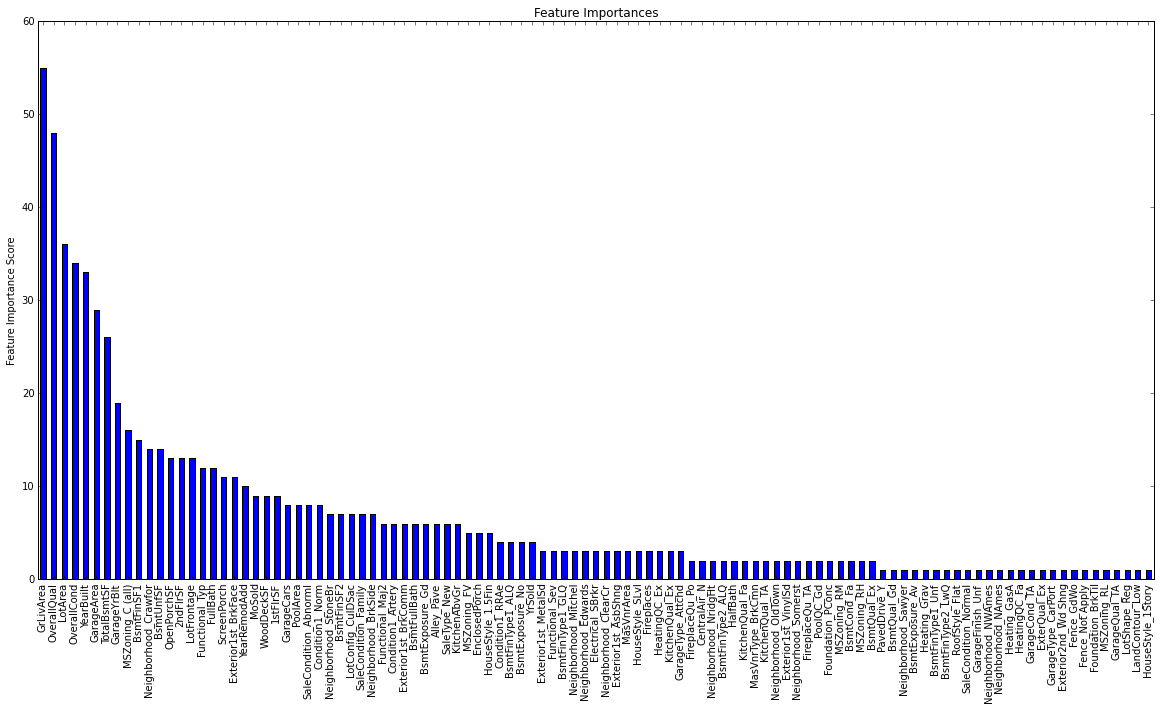

In [62]:
fig = plt.figure(figsize=(20, 10))
xgb_model3 = xgb.XGBRegressor(gamma=0,learning_rate=0.1,max_depth=2,n_estimators=250,reg_alpha=0.01)
modelfit(xgb_model3, df_xtrain,y)

### Get Prediction

In [65]:
df_xtest=pd.DataFrame(data=X_test,columns=df_train.columns)
y_pred = xgb_model3.predict(df_xtest)
y_pred = 2.71828 ** y_pred
result_predict = pd.DataFrame({'Id': ID_test.values, 'SalePrice': y_pred})
np.savetxt('best_xgboost.csv',result_predict, delimiter=',', newline='\n',fmt = '%d', header='Id,SalePrice', footer='', comments='')

---------------

## (4). RDFR (Ramdom Forest Regressor)

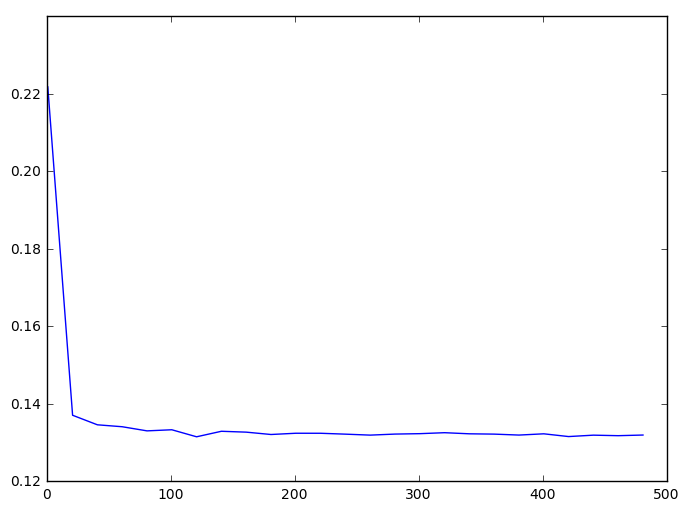

In [108]:

# First find out how many trees are necessary to make reproducible predictions
tree_list = [] # to store the number of trees for each model
cv_rdfr_list = [] # to store the rmse score of each model

for trees in range(1, 501, 20): # actual range was range(1, 501, 20), 100 is used here to decrease running time
    rdfr = RDFR(n_estimators = trees, max_depth = 20, max_features = 100)
    cv_rdfr = rmse_cv(rdfr).mean()
    tree_list += [trees]
    cv_rdfr_list += [cv_rdfr]

# plot rmse score and tree number
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(tree_list, cv_rdfr_list)
plt.show()

From plot shown above, we choose 200 as the number of estimators to estimate the other two parameters, depth and feature size

In [82]:
# search for best depth and feature nubmers, we narrowed our search range below to decrease the runnign time of final jupyter notebook
# Actual search range for depth: [1, 2, 3, 5] + range(10, 51, 5)
# Actual search range for feature: range(15, 200, 15)

depth_list = []
feature_list = []
cv_rdfr_list = []
for depth in [10, 30, 50]: # we actually tested a lot more estimators, here we use only a few decrease the pain to rerun the code
    for feature in[10, 60, 110, 160]: # same as above
        rdfr = RDFR(n_estimators = 200, max_depth = depth, max_features = feature)
        cv_rdfr = rmse_cv(rdfr).mean()
        depth_list += [depth]
        feature_list += [feature]
        cv_rdfr_list += [cv_rdfr]     

In [83]:
# find best parameters

best_score = min(cv_rdfr_list)
index = cv_rdfr_list.index(best_score)
print "Best depth is {}, best feature number is {}".format(depth_list[index], feature_list[index]) 

Best depth is 50, best feature number is 110


In [84]:
# construct best random forest model and important features

rdfr = RDFR(n_estimators = 500, max_depth = 30, max_features = 120) # this is the best combination of parameters we actually found
rdfr.fit(X_train, y)
importances = rdfr.feature_importances_

C:\Users\zhengguo\Anaconda2\lib\site-packages\pandas\tools\plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


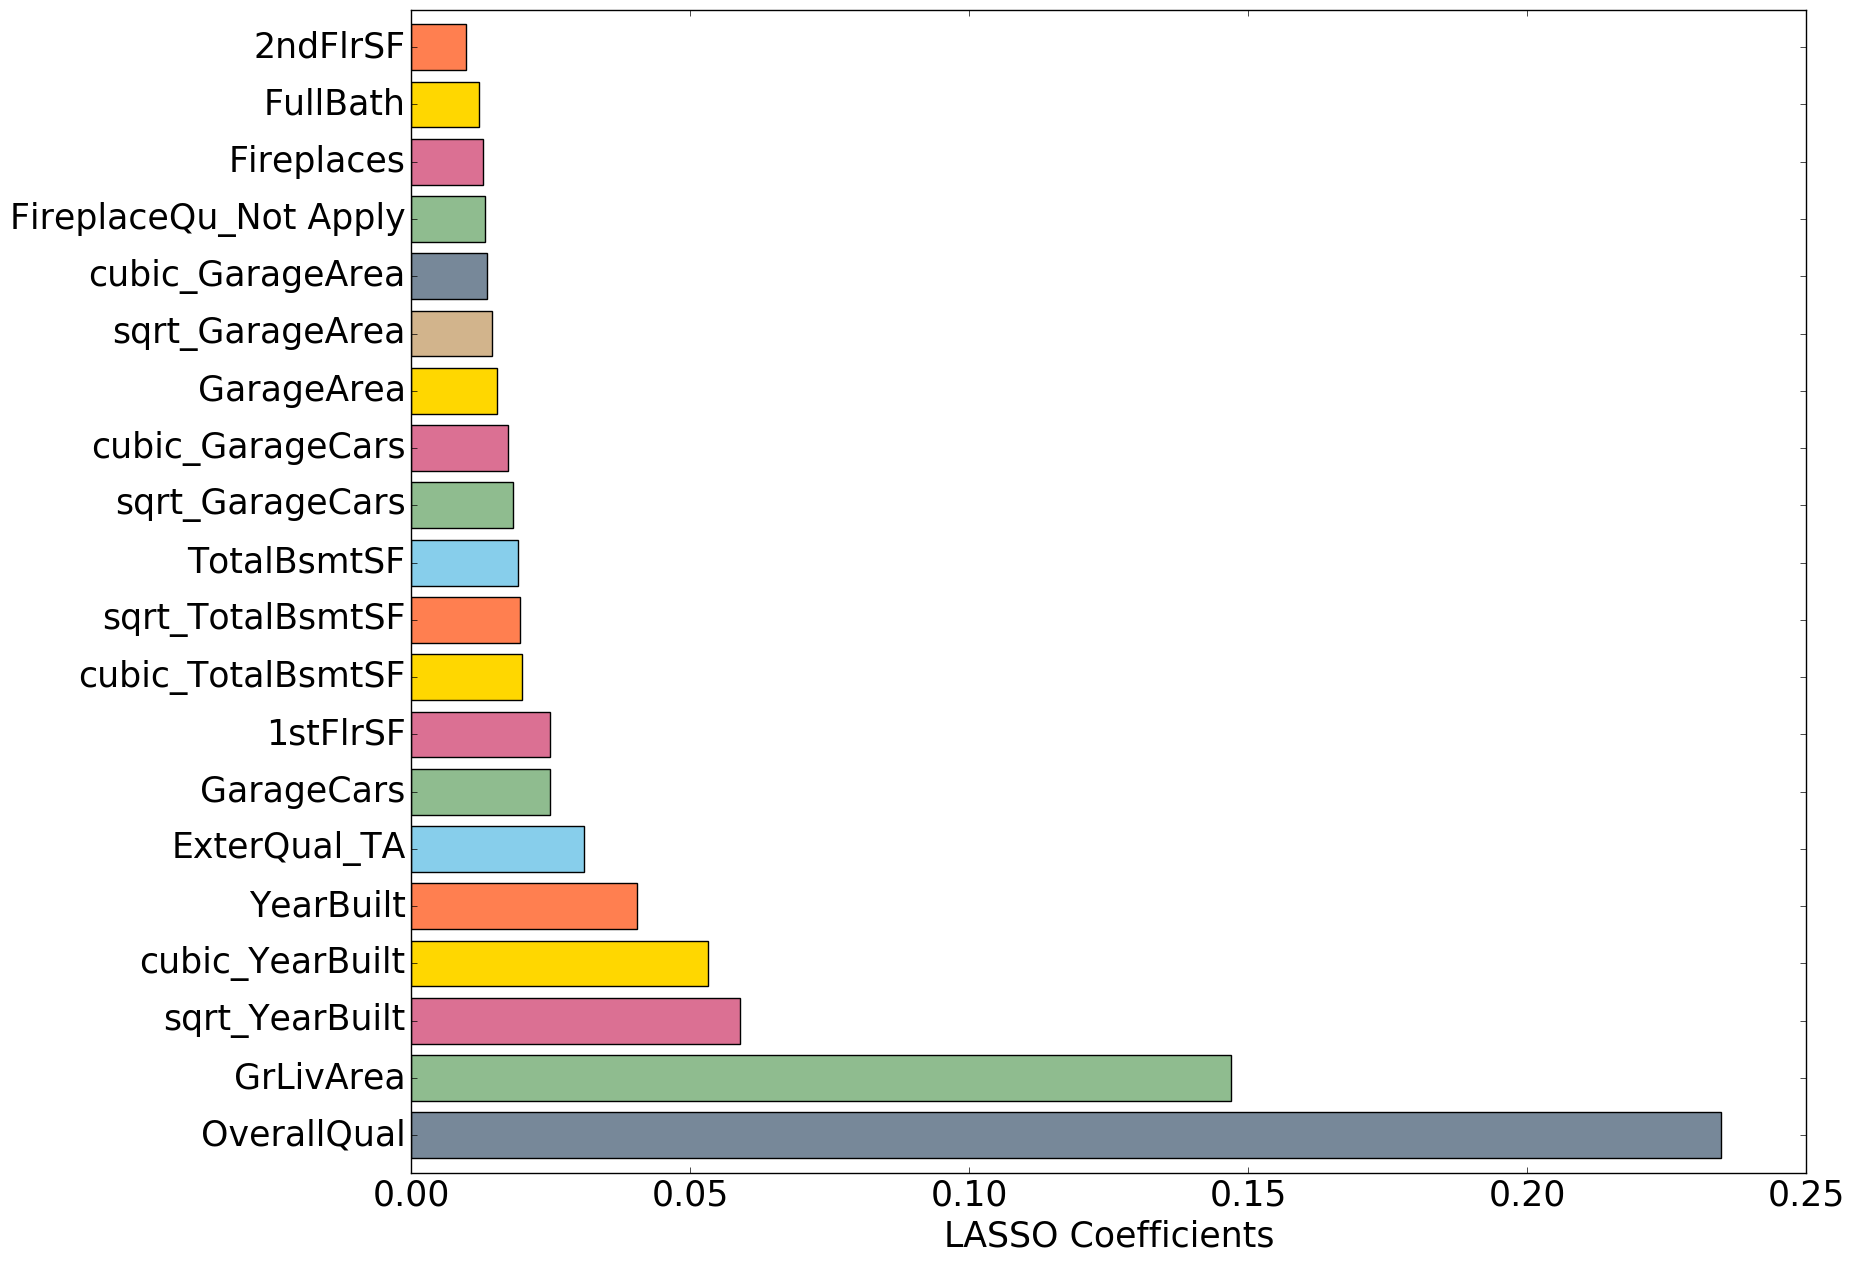

In [85]:
# Plot importance of predictors according to random forest regressor

importances = pd.DataFrame(importances)
importances_sorted = importances.sort_values(by=[0], ascending=[False])
imp_coef = importances_sorted.head(20)
name_index = imp_coef.index.values
feature_index = result.columns.values[name_index]
imp_coef.index = feature_index                    

color_selection = ['lightslategray','darkseagreen','palevioletred','gold','coral','skyblue','darkseagreen','palevioletred','gold','coral','skyblue','darkseagreen','palevioletred','gold','tan','lightslategray','darkseagreen','palevioletred','gold','coral']

matplotlib.rcParams['figure.figsize'] = (18.0, 15.0)
imp_coef.plot(kind = "barh", colors=color_selection,width = 0.8, legend=None, fontsize = 25)
plt.xlabel('LASSO Coefficients', fontsize = 25)
# plt.title("Coefficients in the Lasso Model")

plt.show()

In [86]:
# Predict
y_pred_rdfr = rdfr.predict(X_test)
y_pred_rdfr = 2.71828 ** y_pred_rdfr

result_predict = pd.DataFrame({'Id': ID_test.values, 'SalePrice': y_pred_rdfr})
np.savetxt('best_RDFR.csv',result_predict, delimiter=',', newline='\n',fmt = '%d', header='Id,SalePrice', footer='', comments='')

---------

# (5). SVR (support vector machine regressor)

In [87]:
# To find the best parameters (gamma and C), we did gridsearch
# Again,to decrease the runnign time of final jupyter notebook, we only search very roughly here
# We actually search for best parameters 3 times to gradually refine them, each around best parameter found in the previous search
# The range for both gamma and C investigated is 10 ^-7 to 10^7
from sklearn import svm

num_gammas = 3
gamma_range= np.linspace(-5.5, -4.5, num_gammas)

num_c = 3
c_range = np.linspace(1.5, 2, num_c)

svr_list = np.zeros(num_gammas * num_c * 3)
svr_list = svr_list.reshape(-1, 3)

index_list = 0

for gamma in gamma_range:
    for c in c_range:
        svmsvr = svm.SVR(gamma = 10 ** gamma, C = 10 ** c)
        fold = 10
        svr_list[index_list, 0] = gamma
        svr_list[index_list, 1] = c
        svr_list[index_list, 2] = rmse_cv(svmsvr).mean()
        index_list += 1

In [88]:
# Take out best svm svr model parameter

optimiezed_svr = svr_list[np.argmin(svr_list[:, 2]),]
print "Best gamma is 10 ^{}, best feature number is 10^{}".format(optimiezed_svr[0], optimiezed_svr[1]) 
# actual best parameter we found was 10 ^ -5.2 and 10 ^ 1.65

Best gamma is 10 ^-5.0, best feature number is 10^1.75


In [125]:
# Construct modeland predict with it

svmsvr_opt = svm.SVR(gamma = 10 ** -5.2, C = 10 ** 1.65)
print 'RMSE score is:', rmse_cv(svmsvr_opt).mean()
svmsvr_opt.fit(X_train, y)
y_pred_svr = svmsvr_opt.predict(X_test)
y_pred_svr = 2.71828 ** y_pred_svr

result_predict = pd.DataFrame({'Id': ID_test.values, 'SalePrice': y_pred_svr})
np.savetxt('best_SVR.csv',result_predict, delimiter=',', newline='\n',fmt = '%d', header='Id,SalePrice', footer='', comments='')

RMSE score is: 0.116050385959


The RMSE score on training set is 0.11605

----------

# Elastic Net

The elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.

Reference:
http://users.stat.umn.edu/~zouxx019/Papers/elasticnet.pdf

### Steps

1. We perform the standard data pre-processing as according to this section.

2. We then find the best regularization parameter (lambda) by tuning between the range 10^-7 to 10^7. We also search for the best weight on L1_ratio = L1 regularization (and the weight on L2 would therefore be 1 - L1_ratio). The regularization parameter and L1_ratio that gives the lowest RMSE of 0.10702435767328403 is lambda = 10^-1.9 and L1_ratio = 0.210526315789

In [90]:
# We tune lambda, the regularization parameter, as well as the weights for L1 and L2 in the following 
num_lambdas = 5 # use 5 here to demonstrate, actually used 50
lambdas = np.linspace(-7,7, num_lambdas) # regularization parameter
num_ratios = 2 # use 2 here to demonstrate, actually used 20
l1_ratios =  np.linspace(0, 1, num_ratios) # weight on L1 
cv_lasso_list = np.zeros(num_lambdas * num_ratios * 3)
cv_lasso_list = cv_lasso_list.reshape(-1, 3)
index_list = 0

for i in lambdas:
    for j in l1_ratios:
        cv_lasso_list[index_list, 0] = 10 ** i
        cv_lasso_list[index_list, 1] = j
        cv_lasso_list[index_list, 2] = rmse_cv(ElasticNet(alpha = 10**i, l1_ratio = j)).mean()
        index_list += 1

C:\Users\zhengguo\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:465: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


In [91]:
best_index = np.argmin(cv_lasso_list[:, 2])

best_ratio = cv_lasso_list[best_index, 1]
best_lambda = np.log10(cv_lasso_list[best_index, 0])

best_ratio = 0.107 # this is the actual best ratio with finer grid search
best_lambda = -1.82 # this is the actual best lambda with finer grid search


print 'The best ratio for l1_ratio is:', best_ratio
print 'The best lamdba is 10 ** ', best_lambda

The best ratio for l1_ratio is: 0.107
The best lamdba is 10 **  -1.82


In [92]:
# Finding best parameters with greater precision near best values found above
num_lambdas = 2 # use 2 here to demonstrate, actually used 20
lambdas = np.linspace(best_lambda - 0.7,best_lambda + 0.7, num_lambdas)
num_ratios = 1 # use 1 here to demonstrate, actually used 10
l1_ratios =  np.linspace(best_ratio - 0.1, best_ratio + 0.1, num_ratios)
cv_lasso_list = np.zeros(num_lambdas * num_ratios * 3)
cv_lasso_list = cv_lasso_list.reshape(-1, 3)
index_list = 0

for i in lambdas:
    for j in l1_ratios:
        cv_lasso_list[index_list, 0] = 10 ** i
        cv_lasso_list[index_list, 1] = j
        cv_lasso_list[index_list, 2] = rmse_cv(ElasticNet(alpha = 10**i, l1_ratio = j)).mean()
        index_list += 1

In [93]:
best_index = np.argmin(cv_lasso_list[:, 2])

best_ratio = cv_lasso_list[best_index, 1]

best_ratio = 0.107 # this is the actual best ratio with finer grid search
best_lambda = -1.82 # this is the actual best lambda with finer grid search

best_lambda = np.log10(cv_lasso_list[best_index, 0])
print 'The best ratio for l1_ratio is:', best_ratio
print 'The best lamdba is 10 ** ', best_lambda

The best ratio for l1_ratio is: 0.107
The best lamdba is 10 **  -1.12


3 . We then build a model using these parameters. The model gives a mean RMSE of 0.10702 on the training dataset and a RMSE of 0.12210 on the test dataset. 

In [94]:
elastic_net = ElasticNet(alpha = 10 ** best_lambda, l1_ratio = best_ratio).fit(X_train, y)
rmse_cv(elastic_net).mean()

0.11275729804666708

### Get Prediction on test set

In [95]:
# Predict with our constructed ElastiNet model
y_pred = elastic_net.predict(X_test)
y_pred_elasticnet = 2.71828 ** y_pred
result_predict = pd.DataFrame({'Id': ID_test.values, 'SalePrice': y_pred_elasticnet})
result_predict.to_csv('ElasticNet.csv', header=True,  index = False)

-------

# Model ensemble

# (1) Simple average of 3 best models

In [109]:
# Three best models we indentified were LASSO, ElasticNet and SVR

# construct best 3 models and predict training and testing data sets with them
best_lasso = Lasso(alpha = 10 ** -2.4959595959595959).fit(X_train, y)
y_pred_lasso = best_lasso.predict(X_train)
y_pred_lasso_test = best_lasso.predict(X_test)

elastic_net = ElasticNet(alpha = 10 ** -1.82030075188, l1_ratio = 0.107).fit(X_train, y) 
y_pred_net = elastic_net.predict(X_train)
y_pred_net_test = elastic_net.predict(X_test)

svmsvr_opt = svm.SVR(gamma = 10 ** -5.2, C = 10 ** 1.65)
svmsvr_opt.fit(X_train, y)
y_pred_svr = svmsvr_opt.predict(X_train)
y_pred_svr_test = svmsvr_opt.predict(X_test)

In [110]:
# Construct model and predict with it

y_pred_average = (y_pred_lasso_test + y_pred_net_test + y_pred_svr_test) / 3.0
y_pred_average = 2.71828 ** y_pred_average

result_predict = pd.DataFrame({'Id': ID_test.values, 'SalePrice': y_pred_average})
np.savetxt('Ensemble_average.csv',result_predict, delimiter=',', newline='\n',fmt = '%d', header='Id,SalePrice', footer='', comments='')

# (2) Model Stacking

Logic behind model stacking is that for a specific ovservation, one of the 3 models performs best. If we can find a classifier to predict the best mode given an observation, we can use this model to predict saleprice of that observation. Thus we can always use the best model of the three and get a much better prediction.

We preliminarily test this idea with the same set of predictors as for predicting house price. We construct our target variable by labeling each observation in training data set with the best model to use for prediction.

In [126]:
# Target variable for classifier: label each observation with best model

best_flag = [] #To store best model

for i in range(1456):
    difference = abs(y_pred_lasso[i] - y[i])
    best_temp = 'lasso'
    if abs(y_pred_svr[i] - y[i]) < difference:
        difference = abs(y_pred_svr[i] - y[i])
        best_temp = 'svr'
    if abs(y_pred_net[i] - y[i]) < difference:
        difference = abs(y_pred_net[i] - y[i])
        best_temp = 'net'
    best_flag += [best_temp]

In [127]:
# build a classifier to find the best parameter to predict which model to use
# Here is an example with random forest classifier which is the best model (we also tested logistic regression and svm)
# the range here is narrowed to decrease running time

depth_list = []
feature_list = []
cv_rdfc_class_list = []

for depth in [10, 20]:
    for feature in [10, 50]:
        rdfc = RDFC(n_estimators = 300, max_depth = depth, max_features = feature)
        depth_list += [depth]
        feature_list += [feature]
        fold = 10
        cv_rdfc = sum(cross_val_score(rdfc, X_train, best_flag, cv = fold)) / fold
        cv_rdfc_class_list += [cv_rdfc]

In [128]:
# find best parameters

best_score = min(cv_rdfc_class_list)
index = cv_rdfc_class_list.index(best_score)
print "Best depth is {}, best feature number is {}".format(depth_list[index], feature_list[index]) 
# Actual best parameter found was max_depth = 15 and max_features = 15

Best depth is 20, best feature number is 50


We at first used the predicted model to predict saleprice, however, this is not an improvement. The reason probably is because the classifier is not that accurate, which is about 57% on training set by cross validation. Thus we decide to put a higher weight on the model predicted and put remaining weight on the other model. 

With validation set, we tune the parameter to use for the higher weight

In [129]:
import random
random.seed(50)
number = len(y)
# With random function, generate a list of numbers as indexes to randomly split training set into training and testing groups 
index_training = random.sample(range(number), int(round(number * 0.7)))
index_training = sorted(index_training)
index_testing = [x for x in range(number) if x not in index_training]
train = X_train[index_training]
test = X_train[index_testing]

In [130]:
# find the best weight to use

# build classifier and predict on validation set
rdfc = RDFC(n_estimators = 500, max_depth = 15, max_features = 15)
vs_train_flag = []
for i in index_training:
    vs_train_flag += [best_flag[i]]
rdfc.fit(train, vs_train_flag)
vs_test_flag = rdfc.predict(test)


# construct best 3 models and predict training and testing data sets with them
best_lasso = Lasso(alpha = 10 ** -2.4959595959595959).fit(X_train, y)

elastic_net = ElasticNet(alpha = 10 ** -1.82030075188, l1_ratio = 0.199415204678).fit(X_train, y) 

svmsvr_opt = svm.SVR(gamma = 10 ** -5.2, C = 10 ** 1.65)
svmsvr_opt.fit(X_train, y)

y_pred_vs_net = elastic_net.predict(test)
y_pred_vs_lasso = best_lasso.predict(test)
y_pred_vs_svr = svmsvr_opt.predict(test)

weight_list = []
rmse_list = []
for i in range(0, 100, 1):
    weight_high = (i + 0.0) / 100
    weight_low = (1.0 - weight_high) / 2.0
    index = 0
    y_stack_train = np.zeros(len(test))
    for flag in vs_test_flag:
            if flag == 'net':
                y_stack_train[index] = y_pred_vs_net[index] * weight_high +  y_pred_vs_lasso[index] * weight_low + y_pred_vs_svr[index] * weight_low
            elif flag =='lasso':
                y_stack_train[index] = y_pred_vs_net[index] * weight_low +  y_pred_vs_lasso[index] * weight_high + y_pred_vs_svr[index] * weight_low
            else:
                y_stack_train[index] = y_pred_vs_net[index] * weight_low +  y_pred_vs_lasso[index] * weight_low + y_pred_vs_svr[index] * weight_high
            index += 1
    rmse = mean_squared_error(y[index_testing], y_stack_train) ** 0.5
    weight_list += [weight_high]
    rmse_list += [rmse]

In [131]:

index = rmse_list.index(min(rmse_list))
best_weight = weight_list[index]
print 'The best weight to be used is:', best_weight

The best weight to be used is: 0.59


In [132]:
# Construct model and predict with it

rdfc = RDFC(n_estimators = 500, max_depth = 15, max_features = 15)
rdfc.fit(X_train, best_flag)
test_flag = rdfc.predict(X_test)
y_pred_stack = np.zeros(len(X_test))
index = 0

weight_low = (1.0 - best_weight) / 2
for flag in test_flag:
    if flag == 'net':
        y_pred_stack[index] = y_pred_net_test[index] * best_weight +  y_pred_lasso_test[index] * weight_low + y_pred_svr_test[index] * weight_low
    elif flag =='lasso':
        y_pred_stack[index] = y_pred_net_test[index] * weight_low +  y_pred_lasso_test[index] * best_weight + y_pred_svr_test[index] * weight_low
    else:
        y_pred_stack[index] = y_pred_net_test[index] * weight_low +  y_pred_lasso_test[index] * weight_low + y_pred_svr_test[index] * best_weight
    index += 1

y_pred_stack = 2.71828 ** y_pred_stack

result_predict = pd.DataFrame({'Id': ID_test.values, 'SalePrice': y_pred_stack})
np.savetxt('Ensemble_stack.csv',result_predict, delimiter=',', newline='\n',fmt = '%d', header='Id,SalePrice', footer='', comments='')

# Residual Diagnostic

In [105]:
#plot predicted points
# input:
#    ax1, ax2 and ax3 are subplots for plotting real data points, residuals and histgram of residuals
#    data: dataframe containing x and true y
#    line: dataframe containing x and predicted y
#    line_label: label for plots
# output:
#     subplots ax1, ax2 and ax3
def plot_residual(ax1, ax2, ax3, data, line, line_label):
    ax1.scatter(data['x'].values, 
                data['y'].values, 
                color='blue',
                alpha=0.6,
                label='Data')


    ax1.legend(loc='best')
    ax1.set_title('Data with linear model')

    ax2.scatter(line['x'].values,
                data['y'].values - line['y'].values, 
                color='darkseagreen',
                marker='x',
                alpha=0.6,
                label='Residual')
    
    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')

    ax2.legend(loc='best')
    ax2.set_title('Residual Plot')
    
    ax3.hist(data['y'].values - line['y'].values, bins=30, color='green', alpha=0.7)
    ax3.set_title('Histogram of residual values')
    
    return ax1, ax2, ax3

In [106]:
rdfc = RDFC(n_estimators = 500, max_depth = 15, max_features = 15)
rdfc.fit(X_train, best_flag)
train_flag = rdfc.predict(X_train)
y_pred_stack = np.zeros(len(X_train))
index = 0

weight_low = (1.0 - best_weight) / 2
for flag in train_flag:
    if flag == 'net':
        y_pred_stack[index] = y_pred_net[index] * best_weight +  y_pred_lasso[index] * weight_low + y_pred_svr[index] * weight_low
    elif flag =='lasso':
        y_pred_stack[index] = y_pred_net[index] * weight_low +  y_pred_lasso[index] * best_weight + y_pred_svr[index] * weight_low
    else:
        y_pred_stack[index] = y_pred_net[index] * weight_low +  y_pred_lasso[index] * weight_low + y_pred_svr[index] * best_weight
    index += 1


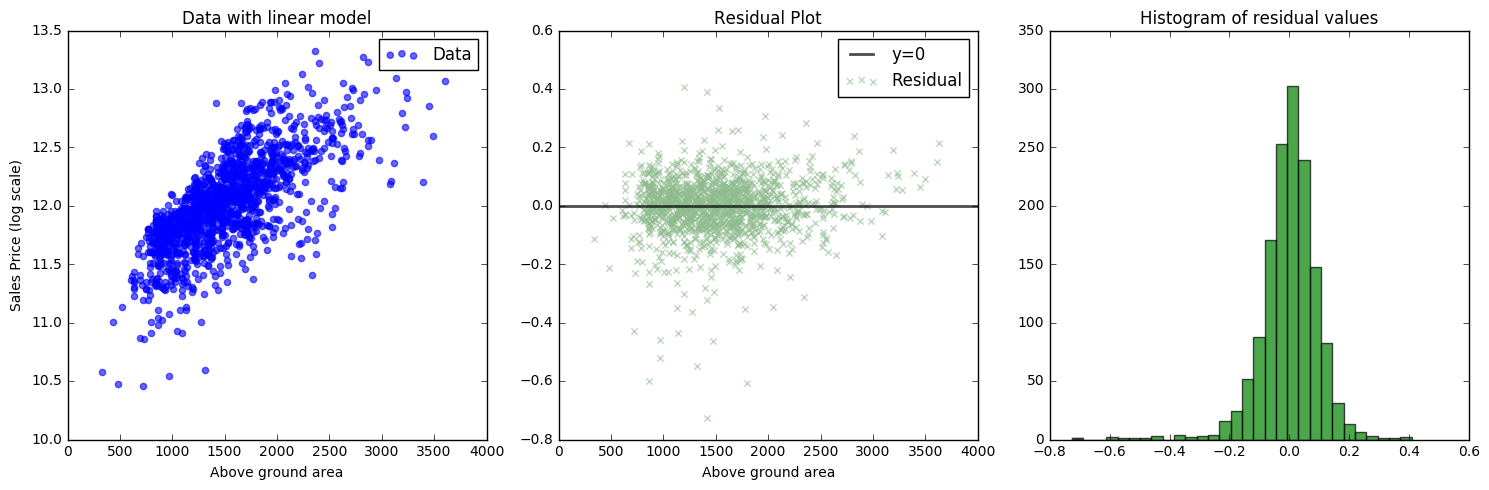

In [107]:
data = pd.DataFrame(data = {'x':df.GrLivArea.values, 'y':logprice})
line = pd.DataFrame(data = {'x':df.GrLivArea.values, 'y':y_pred_stack})
# residual of log price
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))


ax1, ax2, ax3 = plot_residual(ax1, ax2, ax3, data, line, 'residual')
ax1.set_xlabel('Above ground area')
ax1.set_ylabel('Sales Price (log scale)')
ax2.set_xlabel('Above ground area')
plt.tight_layout()
plt.show()